In [64]:
import os
import google_auth_oauthlib.flow
import googleapiclient.discovery
import googleapiclient.errors
from api_key_file import api_key
from IPython.display import JSON
import requests
import json
import pandas as pd
import csv
from pathlib import Path
import functools
from itertools import repeat
import datetime
from datetime import date
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import numpy as np
import sklearn
from scipy.stats import linregress
from matplotlib.ticker import MaxNLocator
from scipy import stats
import scipy.stats as sp


api_service_name = "youtube"
api_version = "v3"

In [2]:
channel_ids = ["UCLKZ20yD2tNMBOkSDZo4FeQ",
"UCzAF54cHk1ZO82af-8E3qOQ",
"UCteRPiisgIoHtMgqHegpWAQ",
"UCw_LFe2pS8x3NyipGNJgeEA",
"UCLLw7jmFsvfIVaUFsLs8mlQ",
"UCDybamfye5An6p-j1t2YMsg",
"UC7cs8q-gJRlGwj4A8OmCmXg",
"UCQiNyL7ik4FIlV2UCvojq0g",
"UCJQJAI7IjbLcpsjWdSzYz0Q",
"UCu1xbgCV5o48h_BYCQD7KJg",
"UCggXQcy57bwxUeZI1LB8DCw",
"UCPcyffOFc7YGyDgqmvZJs7Q",
"UCC8nkE-p-7S0ZPJXrEs2QNA",
"UCcJQ96WlEhJ0Ve0SLmU310Q",
"UCXqKK0ZZO5EhS6USGkGcuiw",
"UCLpovxJVLBZrXJGCymB6LYw",
"UC2fYCeDDpXrQVjSPdJY4lyA",
"UC4MZ7zUHb5eAxU75Dc_nqdQ",
"UC8butISFwT-Wl7EV0hUK0BQ",
"UCsvqVGtbbyHaMoevxPAq9Fg",
"UCilJYqsETFZ7NG9g1xVKfcQ",
"UCsLo154Krjwhoz8W00N8ItA",
"UCsd0xmaXyUGpD35IX4xrYEw",
"UCv3N90AXQxUtaSnKSqOoOpA",
"UCmTS2gGo4gjZLt8LxVnF3XA",
"UCTHAIlSOqquwOKnd_nCJgAQ",
"UCWI-ohtRu8eEeDj93hmUsUQ",
"UC50JofjMZpr3KCbOx6dHi_A",
"UCUOMtzQmEmhIAF8G_cha_Xw",
"UCdngmbVKX1Tgre699-XLlUA",
"UC5qEPWtHLFRIjhW_3xd5g2A",
"UC2UXDak6o7rBm23k3Vv5dww",
"UCyUBW72KU30dfAYWLVNZO8Q",
"UCVe8CMJF4caRzuckVYV8CaQ",
"UCvDqylEzCZJHNea6k1XMkQw",
"UCEDkO7wshcDZ7UZo17rPkzQ",
"UCt-Pwe2fODjH4Wuwf5VqE7A",
"UClLXKYEEM8OBBx85DOa6-cg",
"UCN0u98NPeC0AW3pD6MbVeNg",
"UCwAnu01qlnVg1Ai2AbtTMaA",
"UCthRsjtSd2ZTrfgjgnBXMPw",
"UCx3ZYdyVr8BUQDIhS1QggxA",
"UCo2avEF03abQmCXdU_eUGkg",
"UC4xKdmAXFh4ACyhpiQ_3qBw",
"UCIrOHHdl6C4IWv96N0EaHMA",
"UCJNUtbsYnt-8meFSj_yF50Q",
"UCEHFikgnRuLd1HYKTLrae9Q",
"UC1nBZreWJArdFgiIu3BTeGw",
"UC3kFmMxz3IdLdz4TxA9a4DQ",
"UCpa0VHHeSUV1D17X8MoX5xA"]

In [3]:
len(channel_ids)

50

In [4]:
# Get credentials and create an API client
youtube = googleapiclient.discovery.build(
    api_service_name, api_version, developerKey=api_key)

In [5]:
# channel request (getting all upload playlist ids from 50 selected tech career focused channels)

request = youtube.channels().list(
    part="snippet,contentDetails,statistics",
    id=','.join(channel_ids)
)
response = request.execute()
JSON(response)

<IPython.core.display.JSON object>

In [8]:
# get upload playlists

upload_ids = [item["contentDetails"]["relatedPlaylists"]["uploads"] for item in response["items"]]

In [10]:
video_ids = []
temp = []

In [12]:
for upload_playlist_id in upload_ids:
    count = 0
    #initial request
    request = youtube.playlistItems().list(
    part=['snippet'], 
    maxResults=50, 
    playlistId=upload_playlist_id)  #id=','.join(upload_ids))
    response = request.execute()

    #try to get all of the video id's from the response
    try:
        temp = [video["snippet"]["resourceId"]["videoId"] for video in response["items"]]
        video_ids = video_ids + temp
    except Exception as e:
        print(e)

    #increment page token
    next_page_token = response.get('nextPageToken')
    #print(next_page_token)
    #next_page_token
    
    # https://stackoverflow.com/questions/30653208/retrieve-video-ids-contained-in-a-playlist-youtube-api-v3
    # while there are still pages in the response to parse
    while next_page_token is not None: #and len(video_ids) < 100:
        count += 1
        #print(next_page_token)
        #make the same request, just get the next page of uploads (using nextPageToken which stores the token of the next page of search results
        request = youtube.playlistItems().list(
        part=['snippet'], 
        maxResults=50, 
        playlistId=upload_playlist_id,
        #id=','.join(upload_ids_test),
        pageToken = next_page_token)#id=','.join(upload_ids))

        response = request.execute()
        #make a temporary list of video ids on this page
        try:
            temp = [video["snippet"]["resourceId"]["videoId"] for video in response["items"]]
        except Exception as e:
            print(e)

        # add to video id list
        video_ids = video_ids + temp

        #increment page token
        next_page_token = response.get('nextPageToken')
        if count % 20 == 0:
            print(count)
        #print(next_page_token)

20
40
20
20
20
20
40
60
80
100
120
20
20


In [13]:
len(video_ids)

35299

In [14]:
def concatenate_df(response_json, output_df):    
    response_breakdown = {"snippet": ["channelTitle", "publishedAt", "channelId", "title", "categoryId", "description", "tags"], "contentDetails" : ["duration", "dimension", "definition", "caption", "licensedContent", "projection"], "statistics": ["viewCount", "likeCount", "favoriteCount", "commentCount"]}
    
    for video in response_json:

        row_to_add = {}
        
        #video id, if this isnt there we definitely need to just skip to the next, other parameters can be null
        try:
            row_to_add["id"] = video["id"]
        except KeyError:
            continue
        
        #for each category
        for category, category_list in response_breakdown.items():
            
            #for each feature
            for column_name in category_list:
                try:
                    row_to_add[column_name] = video[category][column_name]
                except KeyError:
                    row_to_add[column_name] = None
        
        row_to_add["Tag Count"] = len(row_to_add["tags"]) if row_to_add["tags"] != None else None
        row_to_add["Description Length (characters)"] = len(row_to_add["description"]) if row_to_add["description"] != None else None
        row_to_add["Description Length (words)"] = len(video["snippet"]["description"].split(" ")) if row_to_add["description"] != None else None
  
        output_df = pd.concat( [ output_df, pd.DataFrame.from_records([row_to_add]) ], ignore_index=True )
    return output_df

In [15]:
final_df = pd.DataFrame()

In [16]:
#https://blog.enterprisedna.co/how-to-write-a-list-to-csv-in-python/
#save video id's to file just in case
with open('video_ids.csv', 'w', newline='') as file:
    # Step 4: Using csv.writer to write the list to the CSV file
    writer = csv.writer(file)
    writer.writerow(video_ids) # Use writerow for single list

In [17]:
video_ids[0]

'2ruoagytC7w'

In [18]:
request = youtube.videos().list(
    part="snippet,contentDetails,statistics",
    id='2ruoagytC7w'
    )
    
response = request.execute()

JSON(response)

<IPython.core.display.JSON object>

In [21]:
#video statistics request

for i in range(0, len(video_ids), 50):
    
    # to avoid list index out of bounds error (dataset not divisible by 50)
    increment = i+50 if (i+50 < len(video_ids)-1) else len(video_ids)-1
    request = youtube.videos().list(
    part="snippet,contentDetails,statistics",
    id=','.join(video_ids[i:increment])
    )
    
    response = request.execute()


    final_df = concatenate_df(response["items"], final_df)
    
    if i % 1000 == 0:
        print(i)

final_df   

0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
25000
26000
27000
28000
29000
30000
31000
32000
33000
34000
35000


,id,channelTitle,publishedAt,channelId,title,categoryId,description,tags,duration,dimension,...,caption,licensedContent,projection,viewCount,likeCount,favoriteCount,commentCount,Tag Count,Description Length (characters),Description Length (words)
0,2ruoagytC7w,PushToProd,2023-09-14T21:00:02Z,UCN0u98NPeC0AW3pD6MbVeNg,day in the life | Jr. Cybersecurity Engineer N...,28,Here’s the part 2 to my day in the life/ vlog!...,"[devops, azure, aws, cloud, docker, kubernetes...",PT7M22S,2d,...,false,True,rectangular,1032,61,0,22,39,162,20
1,gBH1LdSZyFU,PushToProd,2023-09-04T22:27:11Z,UCN0u98NPeC0AW3pD6MbVeNg,day in the life | Jr. Cybersecurity Engineer N...,28,Hey Guys! \n\nHope you enjoy Part 1 of this da...,"[devops, azure, aws, cloud, docker, kubernetes...",PT14M8S,2d,...,false,True,rectangular,2006,86,0,29,39,453,72
2,UhMJ0km4KLs,PushToProd,2023-08-15T21:30:03Z,UCN0u98NPeC0AW3pD6MbVeNg,Prodcast 6 | Is the end of tech near?,28,https://linktr.ee/pushtoprod\n\nHey push2prod ...,"[podcast, devops, azure, aws, cloud, docker, k...",PT19M29S,2d,...,false,True,rectangular,793,55,0,23,39,456,75
3,qYfxI07QrKo,PushToProd,2023-06-13T20:45:01Z,UCN0u98NPeC0AW3pD6MbVeNg,Prodcast 5 | Biology Degree to Data Scientist,28,"Hey push2prod squad. Welcome to back to the ""P...","[podcast, devops, azure, aws, cloud, docker, k...",PT25M9S,2d,...,false,True,rectangular,870,54,0,22,38,393,70
4,CKcYF3369LI,PushToProd,2023-06-07T14:00:10Z,UCN0u98NPeC0AW3pD6MbVeNg,From Suit & Tie to Bonnets and Durags: Embraci...,28,,"[podcast, devops, azure, aws, cloud, docker, k...",PT56S,2d,...,false,True,rectangular,1679,36,0,3,38,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35293,LMyFZVkJsLQ,Chris Sean,2017-01-14T05:43:23Z,UCu1xbgCV5o48h_BYCQD7KJg,All You NEED to BECOME A JUNIOR Web Developer ...,22,Learn to CODE in just a FEW months here: \n- M...,"[how to become a jr web developer, junior web ...",PT9M,2d,...,false,True,rectangular,192485,6246,0,504,18,336,36
35294,rG3HPCGB4hU,Chris Sean,2017-01-09T16:45:08Z,UCu1xbgCV5o48h_BYCQD7KJg,"At The Office, Bad Day & Knowing Your Value | ...",22,Learn to CODE in just a FEW months here: \n- M...,"[daily life of a developer, the day in the lif...",PT8M8S,2d,...,false,True,rectangular,6810,197,0,25,14,336,36
35295,HLgdtA-n_bo,Chris Sean,2016-12-30T00:38:56Z,UCu1xbgCV5o48h_BYCQD7KJg,What It Takes To Become A Web Developer in 2017,22,Learn to CODE in just a FEW months here: \n- M...,"[Learn code, html, php, css, jquery, javascrip...",PT7M35S,2d,...,false,True,rectangular,7054,247,0,43,20,336,36
35296,yAYJD4kKQ7c,Chris Sean,2016-12-22T17:12:12Z,UCu1xbgCV5o48h_BYCQD7KJg,Developers Q & A | Be Humble But Stay Competi...,22,Q & A | Be Humble But Stay Competitive \n\nNot...,"[developer q & a, how to become a developer, l...",PT14M,2d,...,false,True,rectangular,3807,134,0,16,14,385,38


In [23]:
final_df.to_csv('data/video_data_2.csv')  

In [ ]:
# end of collection, start of cleaning

In [5]:
# Import the video data
video_path = os.path.join("data", "video_data_2.csv")
video_df = pd.read_csv(video_path)
video_df

,Unnamed: 0,id,channelTitle,publishedAt,channelId,title,categoryId,description,tags,duration,...,caption,licensedContent,projection,viewCount,likeCount,favoriteCount,commentCount,Tag Count,Description Length (characters),Description Length (words)
0,0,2ruoagytC7w,PushToProd,2023-09-14T21:00:02Z,UCN0u98NPeC0AW3pD6MbVeNg,day in the life | Jr. Cybersecurity Engineer N...,28,Here’s the part 2 to my day in the life/ vlog!...,"['devops', 'azure', 'aws', 'cloud', 'docker', ...",PT7M22S,...,False,True,rectangular,1032,61.0,0,22.0,39.0,162,20
1,1,gBH1LdSZyFU,PushToProd,2023-09-04T22:27:11Z,UCN0u98NPeC0AW3pD6MbVeNg,day in the life | Jr. Cybersecurity Engineer N...,28,Hey Guys! \n\nHope you enjoy Part 1 of this da...,"['devops', 'azure', 'aws', 'cloud', 'docker', ...",PT14M8S,...,False,True,rectangular,2006,86.0,0,29.0,39.0,453,72
2,2,UhMJ0km4KLs,PushToProd,2023-08-15T21:30:03Z,UCN0u98NPeC0AW3pD6MbVeNg,Prodcast 6 | Is the end of tech near?,28,https://linktr.ee/pushtoprod\n\nHey push2prod ...,"['podcast', 'devops', 'azure', 'aws', 'cloud',...",PT19M29S,...,False,True,rectangular,793,55.0,0,23.0,39.0,456,75
3,3,qYfxI07QrKo,PushToProd,2023-06-13T20:45:01Z,UCN0u98NPeC0AW3pD6MbVeNg,Prodcast 5 | Biology Degree to Data Scientist,28,"Hey push2prod squad. Welcome to back to the ""P...","['podcast', 'devops', 'azure', 'aws', 'cloud',...",PT25M9S,...,False,True,rectangular,870,54.0,0,22.0,38.0,393,70
4,4,CKcYF3369LI,PushToProd,2023-06-07T14:00:10Z,UCN0u98NPeC0AW3pD6MbVeNg,From Suit & Tie to Bonnets and Durags: Embraci...,28,NaN,"['podcast', 'devops', 'azure', 'aws', 'cloud',...",PT56S,...,False,True,rectangular,1679,36.0,0,3.0,38.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35293,35293,LMyFZVkJsLQ,Chris Sean,2017-01-14T05:43:23Z,UCu1xbgCV5o48h_BYCQD7KJg,All You NEED to BECOME A JUNIOR Web Developer ...,22,Learn to CODE in just a FEW months here: \n- M...,"['how to become a jr web developer', 'junior w...",PT9M,...,False,True,rectangular,192485,6246.0,0,504.0,18.0,336,36
35294,35294,rG3HPCGB4hU,Chris Sean,2017-01-09T16:45:08Z,UCu1xbgCV5o48h_BYCQD7KJg,"At The Office, Bad Day & Knowing Your Value | ...",22,Learn to CODE in just a FEW months here: \n- M...,"['daily life of a developer', 'the day in the ...",PT8M8S,...,False,True,rectangular,6810,197.0,0,25.0,14.0,336,36
35295,35295,HLgdtA-n_bo,Chris Sean,2016-12-30T00:38:56Z,UCu1xbgCV5o48h_BYCQD7KJg,What It Takes To Become A Web Developer in 2017,22,Learn to CODE in just a FEW months here: \n- M...,"['Learn code', 'html', 'php', 'css', 'jquery',...",PT7M35S,...,False,True,rectangular,7054,247.0,0,43.0,20.0,336,36
35296,35296,yAYJD4kKQ7c,Chris Sean,2016-12-22T17:12:12Z,UCu1xbgCV5o48h_BYCQD7KJg,Developers Q & A | Be Humble But Stay Competi...,22,Q & A | Be Humble But Stay Competitive \n\nNot...,"['developer q & a', 'how to become a developer...",PT14M,...,False,True,rectangular,3807,134.0,0,16.0,14.0,385,38


In [6]:
# Remove the first column
video_df.drop(columns=video_df.columns[0], axis=1, inplace=True)
video_df = video_df.drop_duplicates()

In [8]:
# Videos with duration "P0D" are ongoing live streams, dropping them
for index, row in video_df.iterrows():
    if "P0D" == row["duration"]:
        video_df = video_df.drop([index])

In [10]:
# Convert 'Duration' to seconds

new_duration = []
for index, row in video_df.iterrows():
    if index == 22632:
        new_duration.append(134201)
        continue
    prev_character = ""
    days = []
    hours = []
    minutes = []
    seconds = []
    m_found = False
    h_found = False
    h_exists = "H" in row["duration"]
    m_exists = "M" in row["duration"]
    d_exists = True if row["duration"][1] != "T" else False
    
    
    if d_exists:
        days.append( row["duration"] [ (row["duration"].index("P") + 1) : row["duration"].index("T") - 1 ])

    for character in row["duration"][(row["duration"].index("T") + 1): -1]:
        
        if character != "H" and not h_found and h_exists:
            hours.append(character)  
        elif character == "H":
            h_found = True
        elif character != "M" and not m_found and m_exists:
            minutes.append(character)
        elif character == "M":
            m_found = True
        else:
            seconds.append(character)
    if not d_exists:
        days_count = 0
    else:
        days_count = int(functools.reduce(lambda x,y : x+y, days) if len(days) > 0 else 0)
    #print(index) if len(days) > 0 else None
    hours_count = int(functools.reduce(lambda x,y : x+y, hours) if len(hours) > 0 else 0)
    minutes_count = int(functools.reduce(lambda x,y : x+y, minutes) if len(minutes) > 0 else 0)
    seconds_count = int(functools.reduce(lambda x,y : x+y, seconds) if len(seconds) > 0 else 0)
    
    time = (days_count * 24 + hours_count) * 3600 + minutes_count * 60 + seconds_count
    new_duration.append(time)
    
video_df["Duration (seconds)"] = new_duration

In [11]:
# Fill NaN tags and tag counts
video_df["tags"].fillna('[]', inplace=True)
video_df["Tag Count"].fillna(0, inplace=True)

In [12]:
# Remove unrelated videos
bad_words = ["fitness", "health", "burpees", "morning routine", "Bitcoin", "Crypto", "Currency", "Football", "Laryngitis", "Vacation", "getaway", "roadtrip", "travel"]
dropped_df = pd.DataFrame()
for index, row in video_df.iterrows():
    for word in bad_words:
        if (word in row["title"] and row['channelTitle'] != "Nucamp") or row["title"] == "Dropped Football Data Analysis Project": # excluding Nucamp because they had guides on projects with some keywords listed here
            print(f"Dropped {row['title']} from {row['channelTitle']}")
            try:
                video_df = video_df.drop(index)
            except KeyError:
                print(index)

Dropped 10 jobs that let you travel the world from Shane Hummus
Dropped I Asked Chat-GPT About The Future of Crypto #crypto #shorts from Shane Hummus
Dropped Cryptocurrency INVESTING Mistakes To AVOID (Top 10 Beginner Investing Mistakes!) from Shane Hummus
Dropped I Tried Day Trading Bitcoin For 1 Week from Shane Hummus
Dropped 40F Cold Plunge Daily Grind 💪 #mentalhealth #dailyroutine #motivation #selfimprovement from Dorian Develops
Dropped Sunday Night Cold Plunge 🥶 #mentalhealth #dailyroutine #motivation #selfimprovement from Dorian Develops
Dropped Police travel 500 miles to KILL a little girl's pet goat for a BBQ from Dorian Develops
Dropped Forget Crypto.. Invest in THIS instead! from Dorian Develops
Dropped Be a man! NOBODY CARES about men's mental health! from Dorian Develops
Dropped Take care of your health.. Financial health, physical health and mental health! #Shorts from Dorian Develops
Dropped The stereotype of the remote tech worker traveling 😅. #tech #techjobs #technolog

In [14]:
# Clean up column names
video_df.columns = ['id', 'Channel Title', 'Published At', 'Channel Id', 'Video Title', 'Category Id',
       'Description', 'Tags', 'Duration', 'Dimension', 'Definition', 'Caption',
       'LicensedContent', 'Projection', 'View Count', 'Like Count',
       'Favorite Count', 'Comment Count', 'Tag Count',
       'Description Length (characters)', 'Description Length (words)',
       'Duration (seconds)']

In [15]:
video_df.reset_index(inplace=True, drop=True)

In [17]:
# Create a new column without the timestamp
video_df["Publish Date"] = video_df["Published At"].str[:10]

In [38]:
# Get Jan 1st 2019 as datetime
format = '%Y-%m-%d'
start_date = datetime.datetime.strptime('2019-01-01', format)

In [37]:
# Convert to DateTime
video_df['Publish Date'] = pd.to_datetime(video_df['Publish Date'])

In [39]:
covid_path = os.path.join("data", "covid_vaccines_by_county_cleaned.csv")
covid_df = pd.read_csv(covid_path)
covid_df

,county,administered_date,total_doses,cumulative_total_doses,partially_vaccinated,total_partially_vaccinated,fully_vaccinated,cumulative_fully_vaccinated,at_least_one_dose,cumulative_at_least_one_dose,up_to_date_count,cumulative_up_to_date_count,population,fully_vaccinated_rate,one_dose_rate,up_to_date_rate
0,Alameda,2020-01-05,0,0,0,0,0,0,0,0,0,0,"1,680,380",0.00%,0.00%,0.00%
1,Alameda,2020-07-27,0,0,0,0,0,0,0,0,0,0,"1,680,380",0.00%,0.00%,0.00%
2,Alameda,2020-07-29,0,1,0,1,0,0,0,1,0,0,"1,680,380",0.00%,0.00%,0.00%
3,Alameda,2020-07-30,0,1,0,1,0,0,0,1,0,0,"1,680,380",0.00%,0.00%,0.00%
4,Alameda,2020-07-31,0,1,0,1,0,0,0,1,0,0,"1,680,380",0.00%,0.00%,0.00%
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69438,Yuba,2023-10-11,86,111512,2,4238,0,40347,2,44591,54,7273,84401,47.80%,52.83%,8.62%
69439,Yuba,2023-10-12,87,111599,3,4241,0,40347,3,44594,53,7326,84401,47.80%,52.84%,8.68%
69440,Yuba,2023-10-13,71,111670,2,4243,0,40347,2,44596,53,7379,84401,47.80%,52.84%,8.74%
69441,Yuba,2023-10-14,39,111709,0,4243,0,40347,0,44596,24,7403,84401,47.80%,52.84%,8.77%


In [40]:
covid_df["administered_date"] = pd.to_datetime(covid_df["administered_date"])

In [41]:
# created a shifted column to compare the next recorded day easily
covid_df['administered_date_s'] = covid_df['administered_date'].shift(-1)

In [42]:
# Break down rates by county by month. Done by comparing the next date to the current to make see if it is the last day recorded for that month and county.
rates_by_month_df = pd.DataFrame()
for index, row in covid_df.iterrows():
    if row["administered_date"].month != row["administered_date_s"].month:
        row_to_add = {"County": row["county"], "Year": row["administered_date"].year, "Month": row["administered_date"].month, "Fully Vaccinated Rate": row["fully_vaccinated_rate"], "One Dose Rate": row["one_dose_rate"], "Up To Date Rate": row["up_to_date_rate"],}
        rates_by_month_df = pd.concat( [ rates_by_month_df, pd.DataFrame.from_records([row_to_add]) ], ignore_index=True )

In [43]:
rates_by_month_df["County"].value_counts()

County
Modoc              77
Sierra             76
Alpine             74
Inyo               72
Trinity            69
Plumas             68
Del Norte          67
Mariposa           66
Lassen             66
Siskiyou           65
Mono               65
Glenn              62
Colusa             60
Lake               59
Amador             59
Tuolumne           58
Tehama             57
Mendocino          55
Shasta             54
Kings              53
Madera             53
Yuba               53
San Benito         52
Calaveras          52
Nevada             51
Yolo               50
Santa Cruz         50
Sutter             50
Humboldt           49
Butte              49
Ventura            48
El Dorado          48
Stanislaus         48
Merced             47
San Joaquin        47
Imperial           47
Santa Clara        47
San Mateo          47
San Luis Obispo    47
San Bernardino     47
Sacramento         47
Riverside          47
Placer             47
Napa               47
Fresno             47
Sol

In [44]:
rates_by_month_df['Fully Vaccinated Rate'] = rates_by_month_df['Fully Vaccinated Rate'].str.rstrip('%').astype('float') / 100.0
rates_by_month_df['One Dose Rate'] = rates_by_month_df['One Dose Rate'].str.rstrip('%').astype('float') / 100.0
rates_by_month_df['Up To Date Rate'] = rates_by_month_df['Up To Date Rate'].str.rstrip('%').astype('float') / 100.0

In [45]:
rates_by_month_df

,County,Year,Month,Fully Vaccinated Rate,One Dose Rate,Up To Date Rate
0,Alameda,2020,1,0.000,0.0000,0.0000
1,Alameda,2020,7,0.000,0.0000,0.0000
2,Alameda,2020,8,0.000,0.0000,0.0000
3,Alameda,2020,9,0.000,0.0000,0.0000
4,Alameda,2020,10,0.000,0.0000,0.0000
...,...,...,...,...,...,...
3127,Yuba,2023,6,0.478,0.5271,0.0740
3128,Yuba,2023,7,0.478,0.5274,0.0749
3129,Yuba,2023,8,0.478,0.5277,0.0764
3130,Yuba,2023,9,0.478,0.5280,0.0809


In [46]:
rates_by_month_df.to_csv('data/vaccination_rates_by_month_per_county.csv')

In [47]:
california_df = rates_by_month_df[rates_by_month_df["County"] == "All CA Counties"]

In [48]:
# Dataframe of missing months, we know all these vaccination rates are 0 as there was no vaccine at the time
empty_df = pd.DataFrame( {"County": list(repeat("All CA Counties", 17)), "Year": list(repeat(2019, 12))+ list(repeat(2020, 5)), "Month": [1,2,3,4,5,6,7,8,9,10,11,12,2,3,4,5,6], "Fully Vaccinated Rate": list(repeat(float(0.0000), 17)), "One Dose Rate": list(repeat(float(0.0000), 17)), "Up To Date Rate": list(repeat(float(0.0000), 17)) } )

In [49]:
# https://stackoverflow.com/questions/71767087/concat-dataframes-using-rows-from-second-dataframe-which-dont-exist-in-first-da
# combining missing months with covid data
cols = ["County", "Year", "Month", "Fully Vaccinated Rate", "One Dose Rate", "Up To Date Rate"]
df2_only = (california_df[cols]
            .merge(empty_df, on=cols, indicator=True, how='right')
            .query('_merge == "right_only"').drop(columns='_merge')
           )

california_df = pd.concat([california_df, df2_only])

In [50]:
california_df = california_df.sort_values(["Year", "Month"])

In [51]:
california_df.to_csv('data/vaccination_rates_by_month_california.csv')

In [52]:
# Add month and year column to be able to merge with covid dataset
video_df["Month"] = video_df["Publish Date"].dt.month
video_df["Year"] = video_df["Publish Date"].dt.year

In [53]:
# Merge rates with video data
video_df = pd.merge(video_df, california_df, on=['Year', 'Month'], how='left')
video_df = video_df.drop(['County'], axis=1)

In [54]:
# Cleaning up column names
video_df.rename(columns={"Fully Vaccinated Rate": "Fully Vaccinated Rate (California)", "One Dose Rate": "One Dose Rate (California)", "Up To Date Rate": "Up To Date Rate (California)"})

,id,Channel Title,Published At,Channel Id,Video Title,Category Id,Description,Tags,Duration,Dimension,...,Tag Count,Description Length (characters),Description Length (words),Duration (seconds),Publish Date,Month,Year,Fully Vaccinated Rate (California),One Dose Rate (California),Up To Date Rate (California)
0,2ruoagytC7w,PushToProd,2023-09-14T21:00:02Z,UCN0u98NPeC0AW3pD6MbVeNg,day in the life | Jr. Cybersecurity Engineer N...,28,Here’s the part 2 to my day in the life/ vlog!...,"['devops', 'azure', 'aws', 'cloud', 'docker', ...",PT7M22S,2d,...,39.0,162,20,442,2023-09-14,9,2023,0.7144,0.7952,0.1918
1,gBH1LdSZyFU,PushToProd,2023-09-04T22:27:11Z,UCN0u98NPeC0AW3pD6MbVeNg,day in the life | Jr. Cybersecurity Engineer N...,28,Hey Guys! \n\nHope you enjoy Part 1 of this da...,"['devops', 'azure', 'aws', 'cloud', 'docker', ...",PT14M8S,2d,...,39.0,453,72,848,2023-09-04,9,2023,0.7144,0.7952,0.1918
2,UhMJ0km4KLs,PushToProd,2023-08-15T21:30:03Z,UCN0u98NPeC0AW3pD6MbVeNg,Prodcast 6 | Is the end of tech near?,28,https://linktr.ee/pushtoprod\n\nHey push2prod ...,"['podcast', 'devops', 'azure', 'aws', 'cloud',...",PT19M29S,2d,...,39.0,456,75,1169,2023-08-15,8,2023,0.7144,0.7946,0.1809
3,qYfxI07QrKo,PushToProd,2023-06-13T20:45:01Z,UCN0u98NPeC0AW3pD6MbVeNg,Prodcast 5 | Biology Degree to Data Scientist,28,"Hey push2prod squad. Welcome to back to the ""P...","['podcast', 'devops', 'azure', 'aws', 'cloud',...",PT25M9S,2d,...,38.0,393,70,1509,2023-06-13,6,2023,0.7143,0.7933,0.1734
4,CKcYF3369LI,PushToProd,2023-06-07T14:00:10Z,UCN0u98NPeC0AW3pD6MbVeNg,From Suit & Tie to Bonnets and Durags: Embraci...,28,NaN,"['podcast', 'devops', 'azure', 'aws', 'cloud',...",PT56S,2d,...,38.0,0,1,56,2023-06-07,6,2023,0.7143,0.7933,0.1734
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26506,LMyFZVkJsLQ,Chris Sean,2017-01-14T05:43:23Z,UCu1xbgCV5o48h_BYCQD7KJg,All You NEED to BECOME A JUNIOR Web Developer ...,22,Learn to CODE in just a FEW months here: \n- M...,"['how to become a jr web developer', 'junior w...",PT9M,2d,...,18.0,336,36,540,2017-01-14,1,2017,NaN,NaN,NaN
26507,rG3HPCGB4hU,Chris Sean,2017-01-09T16:45:08Z,UCu1xbgCV5o48h_BYCQD7KJg,"At The Office, Bad Day & Knowing Your Value | ...",22,Learn to CODE in just a FEW months here: \n- M...,"['daily life of a developer', 'the day in the ...",PT8M8S,2d,...,14.0,336,36,488,2017-01-09,1,2017,NaN,NaN,NaN
26508,HLgdtA-n_bo,Chris Sean,2016-12-30T00:38:56Z,UCu1xbgCV5o48h_BYCQD7KJg,What It Takes To Become A Web Developer in 2017,22,Learn to CODE in just a FEW months here: \n- M...,"['Learn code', 'html', 'php', 'css', 'jquery',...",PT7M35S,2d,...,20.0,336,36,455,2016-12-30,12,2016,NaN,NaN,NaN
26509,yAYJD4kKQ7c,Chris Sean,2016-12-22T17:12:12Z,UCu1xbgCV5o48h_BYCQD7KJg,Developers Q & A | Be Humble But Stay Competi...,22,Q & A | Be Humble But Stay Competitive \n\nNot...,"['developer q & a', 'how to become a developer...",PT14M,2d,...,14.0,385,38,840,2016-12-22,12,2016,NaN,NaN,NaN


In [55]:
# Drop unneccessary columns, duration was changed to seconds so the original duration is no longer needed
video_df = video_df.drop(['id', 'Channel Id', 'Duration', 'Dimension'], axis=1)

In [56]:
video_df.to_csv('data/youtube_with_covid.csv')

In [57]:
video_df.columns

Index(['Channel Title', 'Published At', 'Video Title', 'Category Id',
       'Description', 'Tags', 'Definition', 'Caption', 'LicensedContent',
       'Projection', 'View Count', 'Like Count', 'Favorite Count',
       'Comment Count', 'Tag Count', 'Description Length (characters)',
       'Description Length (words)', 'Duration (seconds)', 'Publish Date',
       'Month', 'Year', 'Fully Vaccinated Rate', 'One Dose Rate',
       'Up To Date Rate'],
      dtype='object')

In [58]:
video_df['Description'].fillna("")

0        Here’s the part 2 to my day in the life/ vlog!...
1        Hey Guys! \n\nHope you enjoy Part 1 of this da...
2        https://linktr.ee/pushtoprod\n\nHey push2prod ...
3        Hey push2prod squad. Welcome to back to the "P...
4                                                         
                               ...                        
26506    Learn to CODE in just a FEW months here: \n- M...
26507    Learn to CODE in just a FEW months here: \n- M...
26508    Learn to CODE in just a FEW months here: \n- M...
26509    Q & A | Be Humble But Stay Competitive \n\nNot...
26510    How Can You Become a Web Developer?\n\nTreeHou...
Name: Description, Length: 26511, dtype: object

In [59]:
# End of Cleaning, start T-Test

In [60]:
# # Load CSV and store Data Frame
# df = pd.read_csv('data/youtube_with_covid.csv', index_col = 0)
# df.head()

,Channel Title,Published At,Video Title,Category Id,Description,Tags,Definition,Caption,LicensedContent,Projection,...,Tag Count,Description Length (characters),Description Length (words),Duration (seconds),Publish Date,Month,Year,Fully Vaccinated Rate,One Dose Rate,Up To Date Rate
0,PushToProd,2023-09-14T21:00:02Z,day in the life | Jr. Cybersecurity Engineer N...,28,Here’s the part 2 to my day in the life/ vlog!...,"['devops', 'azure', 'aws', 'cloud', 'docker', ...",hd,False,True,rectangular,...,39.0,162,20,442,2023-09-14,9,2023,0.7144,0.7952,0.1918
1,PushToProd,2023-09-04T22:27:11Z,day in the life | Jr. Cybersecurity Engineer N...,28,Hey Guys! \n\nHope you enjoy Part 1 of this da...,"['devops', 'azure', 'aws', 'cloud', 'docker', ...",hd,False,True,rectangular,...,39.0,453,72,848,2023-09-04,9,2023,0.7144,0.7952,0.1918
2,PushToProd,2023-08-15T21:30:03Z,Prodcast 6 | Is the end of tech near?,28,https://linktr.ee/pushtoprod\n\nHey push2prod ...,"['podcast', 'devops', 'azure', 'aws', 'cloud',...",hd,False,True,rectangular,...,39.0,456,75,1169,2023-08-15,8,2023,0.7144,0.7946,0.1809
3,PushToProd,2023-06-13T20:45:01Z,Prodcast 5 | Biology Degree to Data Scientist,28,"Hey push2prod squad. Welcome to back to the ""P...","['podcast', 'devops', 'azure', 'aws', 'cloud',...",hd,False,True,rectangular,...,38.0,393,70,1509,2023-06-13,6,2023,0.7143,0.7933,0.1734
4,PushToProd,2023-06-07T14:00:10Z,From Suit & Tie to Bonnets and Durags: Embraci...,28,NaN,"['podcast', 'devops', 'azure', 'aws', 'cloud',...",hd,False,True,rectangular,...,38.0,0,1,56,2023-06-07,6,2023,0.7143,0.7933,0.1734


In [62]:
# define populations for t test
population_views = video_df["View Count"]
population_likes = video_df["Like Count"]
population_comments = video_df["Comment Count"]
population_fully_vaxxed = video_df["Fully Vaccinated Rate"]
population_one_dose = video_df["One Dose Rate"]
population_utd = video_df["Up To Date Rate"]

In [68]:
# views and fully vaxxed test
views_fully_vaccinated = sp.ttest_ind(population_views.dropna(), population_fully_vaxxed.dropna(), equal_var = False)
views_fully_vaccinated

TtestResult(statistic=22.69832174887781, pvalue=5.56278839451638e-113, df=26510.000000018375)

In [69]:
# likes and fully vaxxed test
likes_fully_vaccinated = sp.ttest_ind(population_likes.dropna(), population_fully_vaxxed.dropna(), equal_var = False)
likes_fully_vaccinated

TtestResult(statistic=24.189719623856778, pvalue=7.120238910545247e-128, df=26312.000025754412)

In [71]:
# comments and fully vaxxed test
comments_fully_vaccinated = sp.ttest_ind(population_comments.dropna(), population_fully_vaxxed.dropna(), equal_var = False)
comments_fully_vaccinated

TtestResult(statistic=26.46289683940867, pvalue=2.495069810853189e-152, df=26457.013767270426)

In [72]:
# vies and one dose test
views_one_dose = sp.ttest_ind(population_views.dropna(), population_one_dose.dropna(), equal_var = False)
views_one_dose

TtestResult(statistic=22.698304324996588, pvalue=5.564951087410893e-113, df=26510.00000002164)

In [73]:
# likes and one dose test
likes_one_dose = sp.ttest_ind(population_likes.dropna(), population_one_dose.dropna(), equal_var = False)
likes_one_dose

TtestResult(statistic=24.18906494710355, pvalue=7.231593339502409e-128, df=26312.000030333907)

In [74]:
# comments and one dose test
comments_one_dose = sp.ttest_ind(population_comments.dropna(), population_one_dose.dropna(), equal_var = False)
comments_one_dose

TtestResult(statistic=26.447801306399313, pvalue=3.6837673172690923e-152, df=26457.016215276944)

In [75]:
# views and up to date test (utd)
views_utd = sp.ttest_ind(population_views.dropna(), population_utd.dropna(), equal_var = False)
views_utd

TtestResult(statistic=22.698457887943125, pvalue=5.54591935377931e-113, df=26510.000000001306)

In [76]:
# likes and up to date (utd)
likes_utd = sp.ttest_ind(population_likes.dropna(), population_utd.dropna(), equal_var = False)
likes_utd

TtestResult(statistic=24.19483484668245, pvalue=6.307118793533617e-128, df=26312.000001838987)

In [77]:
# comments and up to date (utd)
comments_utd = sp.ttest_ind(population_comments.dropna(), population_utd.dropna(), equal_var = False)
comments_utd

TtestResult(statistic=26.580842113197253, pvalue=1.179946583666071e-153, df=26457.000983045742)

In [78]:
# Fully Vaccinated Results Data Frame
results_fv_df = pd.DataFrame([{
    "Test" : "Views and Fully Vaccinated",
    "T-statistic" : 33.11275852135825,
    "P-Value" : 2.4751012736263558e-234,
},
{
    "Test" : "Likes and Fully Vaccinated",
    "T-statistic" : 28.09123186070257,
    "P-Value" : 2.031316572047043e-170,
},
{
    "Test" : "Comments and Fully Vaccinated",
    "T-statistic" : 32.97445497844585,
    "P-Value" : 1.908052363149919e-232,
}])
results_fv_df

,Test,T-statistic,P-Value
0,Views and Fully Vaccinated,33.112759,2.475101e-234
1,Likes and Fully Vaccinated,28.091232,2.031317e-170
2,Comments and Fully Vaccinated,32.974455,1.908052e-232


In [79]:
# One Dose Results Data Frame
results_od_df = pd.DataFrame([{
    "Test" : "Views and One Dose",
    "T-statistic" : 28.85618019608032,
    "P-Value" : 1.481831342491897e-179,
},
{
    "Test" : "Likes and One Dose",
    "T-statistic" : 28.09054588546865,
    "P-Value" : 2.069415384642455e-170,
},
{
    "Test" : "Comments and One Dose",
    "T-statistic" : 32.956753730542786,
    "P-Value" : 3.3234697653832605e-232,
}])
results_od_df

,Test,T-statistic,P-Value
0,Views and One Dose,28.856180,1.481831e-179
1,Likes and One Dose,28.090546,2.069415e-170
2,Comments and One Dose,32.956754,3.323470e-232


In [80]:
# Up to Date Results Data Frame
results_utd_df = pd.DataFrame([{
    "Test" : "Views and Up to Date",
    "T-statistic" : 28.856369378478696,
    "P-Value" : 1.4740652000265236e-179,
},
{
    "Test" : "Likes and Up to Date",
    "T-statistic" : 28.09659162909455,
    "P-Value" : 1.7567787947857795e-170,
},
{
    "Test" : "Comments and Up to Date",
    "T-statistic" : 33.11275852135825,
    "P-Value" : 2.4751012736263558e-234,
}])
results_utd_df

,Test,T-statistic,P-Value
0,Views and Up to Date,28.856369,1.474065e-179
1,Likes and Up to Date,28.096592,1.756779e-170
2,Comments and Up to Date,33.112759,2.475101e-234


In [81]:
# Combining Results Data Frames
complete_results_df = pd.concat([results_fv_df, results_od_df, results_utd_df])
complete_results_df

,Test,T-statistic,P-Value
0,Views and Fully Vaccinated,33.112759,2.475101e-234
1,Likes and Fully Vaccinated,28.091232,2.031317e-170
2,Comments and Fully Vaccinated,32.974455,1.908052e-232
0,Views and One Dose,28.856180,1.481831e-179
1,Likes and One Dose,28.090546,2.069415e-170
2,Comments and One Dose,32.956754,3.323470e-232
0,Views and Up to Date,28.856369,1.474065e-179
1,Likes and Up to Date,28.096592,1.756779e-170
2,Comments and Up to Date,33.112759,2.475101e-234


In [83]:
#Load CSV
youtube_csv = Path("data", "video_data_cleaned.csv")

#Read CSV
youtube_data = pd.read_csv(youtube_csv)
youtube_data.head()

,Unnamed: 0,id,Channel Title,Published At,Channel Id,Video Title,Category Id,Description,Tags,Duration,...,LicensedContent,Projection,View Count,Like Count,Favorite Count,Comment Count,Tag Count,Description Length (characters),Description Length (words),Duration (seconds)
0,0,2ruoagytC7w,PushToProd,2023-09-14T21:00:02Z,UCN0u98NPeC0AW3pD6MbVeNg,day in the life | Jr. Cybersecurity Engineer N...,28,Here’s the part 2 to my day in the life/ vlog!...,"['devops', 'azure', 'aws', 'cloud', 'docker', ...",PT7M22S,...,True,rectangular,1032,61.0,0,22.0,39.0,162,20,442
1,1,gBH1LdSZyFU,PushToProd,2023-09-04T22:27:11Z,UCN0u98NPeC0AW3pD6MbVeNg,day in the life | Jr. Cybersecurity Engineer N...,28,Hey Guys! \n\nHope you enjoy Part 1 of this da...,"['devops', 'azure', 'aws', 'cloud', 'docker', ...",PT14M8S,...,True,rectangular,2006,86.0,0,29.0,39.0,453,72,848
2,2,UhMJ0km4KLs,PushToProd,2023-08-15T21:30:03Z,UCN0u98NPeC0AW3pD6MbVeNg,Prodcast 6 | Is the end of tech near?,28,https://linktr.ee/pushtoprod\n\nHey push2prod ...,"['podcast', 'devops', 'azure', 'aws', 'cloud',...",PT19M29S,...,True,rectangular,793,55.0,0,23.0,39.0,456,75,1169
3,3,qYfxI07QrKo,PushToProd,2023-06-13T20:45:01Z,UCN0u98NPeC0AW3pD6MbVeNg,Prodcast 5 | Biology Degree to Data Scientist,28,"Hey push2prod squad. Welcome to back to the ""P...","['podcast', 'devops', 'azure', 'aws', 'cloud',...",PT25M9S,...,True,rectangular,870,54.0,0,22.0,38.0,393,70,1509
4,4,CKcYF3369LI,PushToProd,2023-06-07T14:00:10Z,UCN0u98NPeC0AW3pD6MbVeNg,From Suit & Tie to Bonnets and Durags: Embraci...,28,NaN,"['podcast', 'devops', 'azure', 'aws', 'cloud',...",PT56S,...,True,rectangular,1679,36.0,0,3.0,38.0,0,1,56


In [85]:
#2023 video
year_twenty_three= youtube_data.loc[youtube_data['Published At'].str.contains("2023")]

In [86]:
#Total video 2023
year_twenty_three_total= year_twenty_three['id'].count()

In [87]:
#Total view 2023
twenty_three_total_view= year_twenty_three['View Count'].sum()

#Average View per video 2023
twenty_three_avg_view= year_twenty_three['View Count'].mean()

In [88]:
#Total like 2023
twenty_three_total_like= year_twenty_three['Like Count'].sum()

#Average Like per video 2023
twenty_three_avg_like= year_twenty_three['Like Count'].mean()

In [89]:
#Total comment 2023
twenty_three_total_com= year_twenty_three['Comment Count'].sum()

#Average comment per video 2023
twenty_three_avg_com= year_twenty_three['Comment Count'].mean()

In [90]:
# 2023 top 5 channel
twenty_three_top_five= year_twenty_three['Channel Title'].value_counts()
twenty_three_top_five.head(5)

Channel Title
Simplilearn                              1753
Tech Is The New Black                     656
Degree Free                               611
Recruiter Preston                         293
Black Heights - Advancing Your Career     292
Name: count, dtype: int64

In [91]:
#2023 Summary
twenty_three_summary = pd.DataFrame({"Total Videos":[year_twenty_three_total],
                                     "Total view":[twenty_three_total_view],
                                     "Average View":[twenty_three_avg_view],
                                     "Total like":[twenty_three_total_like],
                                     "Average Like":[twenty_three_avg_like],
                                     "Total comment":[twenty_three_total_com],
                                     "Average comment":[twenty_three_avg_com]})
twenty_three_summary

,Total Videos,Total view,Average View,Total like,Average Like,Total comment,Average comment
0,6480,186602077,28796.616821,7268954.0,1126.27115,296043.0,45.777486


In [92]:
#2022 Video
year_twenty_two= youtube_data.loc[youtube_data['Published At'].str.contains("2022")]

In [93]:
#Total video 2022
year_twenty_two_total= year_twenty_two['id'].count()

In [94]:
#Total view 2022
twenty_two_total_view= year_twenty_two['View Count'].sum()

#Average View per video 2022
twenty_two_avg_view= year_twenty_two['View Count'].mean()

In [95]:
#Total like 2022
twenty_two_total_like= year_twenty_two['Like Count'].sum()

#Average Like per video 2022
twenty_two_avg_like= year_twenty_two['Like Count'].mean()

In [96]:
#Total comment 2022
twenty_two_total_com= year_twenty_two['Comment Count'].sum()

#Average comment per video 2022
twenty_two_avg_com= year_twenty_two['Comment Count'].mean()

In [97]:
#2022 top 5 channel
twenty_two_top_five= year_twenty_two['Channel Title'].value_counts()
twenty_two_top_five.head(5)

Channel Title
Simplilearn                              1395
Recruiter Preston                         646
Degree Free                               504
Black Heights - Advancing Your Career     342
Coding with Lewis                         282
Name: count, dtype: int64

In [98]:
#2022 Summary
twenty_two_summary = pd.DataFrame({"Total Videos":[year_twenty_two_total],
                                     "Total view":[twenty_two_total_view],
                                     "Average View":[twenty_two_avg_view],
                                     "Total like":[twenty_two_total_like],
                                     "Average Like":[twenty_two_avg_like],
                                     "Total comment":[twenty_two_total_com],
                                     "Average comment":[twenty_two_avg_com]})
twenty_two_summary

,Total Videos,Total view,Average View,Total like,Average Like,Total comment,Average comment
0,6138,402914860,65642.694689,15415783.0,2522.215805,493196.0,80.508652


In [99]:
#2021 video
year_twenty_one= youtube_data.loc[youtube_data['Published At'].str.contains("2021")]


In [100]:
#Total video 2021
year_twenty_one_total= year_twenty_one['id'].count()

In [101]:
#Total view 2021
twenty_one_total_view= year_twenty_one['View Count'].sum()

#Average View per video 2021
twenty_one_avg_view= year_twenty_one['View Count'].mean()

In [102]:
#Total like 2021
twenty_one_total_like= year_twenty_one['Like Count'].sum()

#Average Like per video 2021
twenty_one_avg_like= year_twenty_one['Like Count'].mean()

In [103]:
#Total comment 2021
twenty_one_total_com= year_twenty_one['Comment Count'].sum()

#Average comment per video 2021
twenty_one_avg_com= year_twenty_one['Comment Count'].mean()

In [104]:
#2021 top 5 channel
twenty_one_top_five= year_twenty_one['Channel Title'].value_counts()
twenty_one_top_five.head(5)

Channel Title
Simplilearn                              1179
Stefan Mischook                           238
Black Heights - Advancing Your Career     233
freeCodeCamp.org                          210
Shane Hummus                              187
Name: count, dtype: int64

In [105]:
#2021 summary
twenty_one_summary = pd.DataFrame({"Total Videos":[year_twenty_one_total],
                                     "Total view":[twenty_one_total_view],
                                     "Average View":[twenty_one_avg_view],
                                     "Total like":[twenty_one_total_like],
                                     "Average Like":[twenty_one_avg_like],
                                     "Total comment":[twenty_one_total_com],
                                     "Average comment":[twenty_one_avg_com]})
twenty_one_summary

,Total Videos,Total view,Average View,Total like,Average Like,Total comment,Average comment
0,4080,423513932,103802.434314,11431765.0,2824.750432,587569.0,144.472338


In [106]:
#2020 video
year_twenty= youtube_data.loc[youtube_data['Published At'].str.contains("2020")]

In [107]:
#Total video 2020
year_twenty_total= year_twenty['id'].count()

In [108]:
#Total view 2020
twenty_total_view= year_twenty['View Count'].sum()

#Average View per video 2021
twenty_avg_view= year_twenty['View Count'].mean()

In [109]:
#Total like 2020
twenty_total_like= year_twenty['Like Count'].sum()

#Average Like per video 2020
twenty_avg_like= year_twenty['Like Count'].mean()

In [110]:
#Total comment 2020
twenty_total_com= year_twenty['Comment Count'].sum()

#Average comment per video 2020
twenty_avg_com= year_twenty['Comment Count'].mean()

In [111]:
#2020 top 5 channel
twenty_top_five= year_twenty['Channel Title'].value_counts()
twenty_top_five.head(5)

Channel Title
Simplilearn                627
Jobskillshare Community    223
freeCodeCamp.org           198
Stefan Mischook            189
Shane Hummus               177
Name: count, dtype: int64

In [112]:
#2020 summary
twenty_summary = pd.DataFrame({"Total Videos":[year_twenty_total],
                                     "Total view":[twenty_total_view],
                                     "Average View":[twenty_avg_view],
                                     "Total like":[twenty_total_like],
                                     "Average Like":[twenty_avg_like],
                                     "Total comment":[twenty_total_com],
                                     "Average comment":[twenty_avg_com]})

twenty_summary

,Total Videos,Total view,Average View,Total like,Average Like,Total comment,Average comment
0,2493,377401288,151384.391496,9910979.0,4048.602533,526663.0,211.936821


In [113]:
#2019 video
year_nineteen= youtube_data.loc[youtube_data['Published At'].str.contains("2019")]

In [114]:
#Total video 2019
year_nineteen_total= year_nineteen['id'].count()

In [115]:
#Total view 2019
nineteen_total_view= year_nineteen['View Count'].sum()

#Average View per video 2019
nineteen_avg_view= year_nineteen['View Count'].mean()

In [116]:
#Total like 2019
nineteen_total_like= year_nineteen['Like Count'].sum()

#Average Like per video 2019
nineteen_avg_like= year_nineteen['Like Count'].mean()

In [117]:
#Total comment 2019
nineteen_total_com= year_nineteen['Comment Count'].sum()

#Average comment per video 2019
nineteen_avg_com= year_nineteen['Comment Count'].mean()

In [118]:
#2019 top 5 channel
nineteen_top_five= year_nineteen['Channel Title'].value_counts()
nineteen_top_five.head(5)

Channel Title
Simplilearn                240
Stefan Mischook            225
IT Career Questions        206
freeCodeCamp.org           168
Jobskillshare Community    163
Name: count, dtype: int64

In [119]:
#2019 summary
nineteen_summary = pd.DataFrame({"Total Videos":[year_nineteen_total],
                                     "Total view":[nineteen_total_view],
                                     "Average View":[nineteen_avg_view],
                                     "Total like":[nineteen_total_like],
                                     "Average Like":[nineteen_avg_like],
                                     "Total comment":[nineteen_total_com],
                                     "Average comment":[nineteen_avg_com]})

nineteen_summary

,Total Videos,Total view,Average View,Total like,Average Like,Total comment,Average comment
0,1552,284221923,183132.682345,6633049.0,4324.021512,423009.0,272.733075


In [120]:
#Total summary
total_summary= pd.DataFrame({"Year":[2023,2022,2021,2020,2019],
                            "Total Videos":[year_twenty_three_total,year_twenty_two_total,year_twenty_one_total,year_twenty_total,year_nineteen_total],
                            "Total view":[twenty_three_total_view,twenty_two_total_view,twenty_one_total_view,twenty_total_view,nineteen_total_view],
                            "Average View":[twenty_three_avg_view,twenty_two_avg_view,twenty_one_avg_view,twenty_avg_view,nineteen_avg_view],
                            "Total like":[twenty_three_total_like,twenty_two_total_like,twenty_one_total_like,twenty_total_like,nineteen_total_like],
                            "Average Like":[twenty_three_avg_like,twenty_two_avg_like,twenty_one_avg_like,twenty_avg_like,nineteen_avg_like],
                            "Total comment":[twenty_three_total_com,twenty_two_total_com,twenty_one_total_com,twenty_total_com,nineteen_total_com],
                            "Average comment":[twenty_three_avg_com,twenty_two_avg_com,twenty_one_avg_com,twenty_avg_com,nineteen_avg_com]})

total_summary

,Year,Total Videos,Total view,Average View,Total like,Average Like,Total comment,Average comment
0,2023,6480,186602077,28796.616821,7268954.0,1126.271150,296043.0,45.777486
1,2022,6138,402914860,65642.694689,15415783.0,2522.215805,493196.0,80.508652
2,2021,4080,423513932,103802.434314,11431765.0,2824.750432,587569.0,144.472338
3,2020,2493,377401288,151384.391496,9910979.0,4048.602533,526663.0,211.936821
4,2019,1552,284221923,183132.682345,6633049.0,4324.021512,423009.0,272.733075


In [121]:
#Vaccine data

In [124]:
#Load vaccine CSV
vaccine_csv = Path("data", "covid_vaccines_by_county_cleaned.csv")

#Read vaccine CSV
vaccine_data = pd.read_csv(vaccine_csv)
vaccine_data.head()

,county,administered_date,total_doses,cumulative_total_doses,partially_vaccinated,total_partially_vaccinated,fully_vaccinated,cumulative_fully_vaccinated,at_least_one_dose,cumulative_at_least_one_dose,up_to_date_count,cumulative_up_to_date_count,population,fully_vaccinated_rate,one_dose_rate,up_to_date_rate
0,Alameda,2020-01-05,0,0,0,0,0,0,0,0,0,0,"1,680,380",0.00%,0.00%,0.00%
1,Alameda,2020-07-27,0,0,0,0,0,0,0,0,0,0,"1,680,380",0.00%,0.00%,0.00%
2,Alameda,2020-07-29,0,1,0,1,0,0,0,1,0,0,"1,680,380",0.00%,0.00%,0.00%
3,Alameda,2020-07-30,0,1,0,1,0,0,0,1,0,0,"1,680,380",0.00%,0.00%,0.00%
4,Alameda,2020-07-31,0,1,0,1,0,0,0,1,0,0,"1,680,380",0.00%,0.00%,0.00%


In [125]:
vaccine_all_county= vaccine_data.loc[vaccine_data['county'].str.contains("All CA Counties")]
vaccine_all_county

,county,administered_date,total_doses,cumulative_total_doses,partially_vaccinated,total_partially_vaccinated,fully_vaccinated,cumulative_fully_vaccinated,at_least_one_dose,cumulative_at_least_one_dose,up_to_date_count,cumulative_up_to_date_count,population,fully_vaccinated_rate,one_dose_rate,up_to_date_rate
1177,All CA Counties,2020-01-05,1,1,1,1,0,0,1,1,0,0,"39,501,653",0.00%,0.00%,0.00%
1178,All CA Counties,2020-07-27,3,4,3,4,0,0,3,4,0,0,"39,501,653",0.00%,0.00%,0.00%
1179,All CA Counties,2020-07-28,7,11,7,11,0,0,7,11,0,0,"39,501,653",0.00%,0.00%,0.00%
1180,All CA Counties,2020-07-29,12,23,12,23,0,0,12,23,0,0,"39,501,653",0.00%,0.00%,0.00%
1181,All CA Counties,2020-07-30,14,37,14,37,0,0,14,37,0,0,"39,501,653",0.00%,0.00%,0.00%
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2349,All CA Counties,2023-10-11,86251,89766472,2094,3263556,21,28737668,2094,32003111,60450,8254515,40223501,71.44%,79.56%,20.52%
2350,All CA Counties,2023-10-12,90033,89856505,2167,3265695,28,28737696,2167,32005278,63401,8317916,40223501,71.45%,79.57%,20.68%
2351,All CA Counties,2023-10-13,101433,89957938,2381,3268063,13,28737709,2381,32007659,72484,8390400,40223501,71.45%,79.57%,20.86%
2352,All CA Counties,2023-10-14,48368,90006306,1264,3269320,7,28737716,1264,32008923,35366,8425766,40223501,71.45%,79.58%,20.95%


In [126]:
#Vaccine 2023 data
vaccine_rate_twenty_three= vaccine_all_county.loc[vaccine_all_county['administered_date'].str.contains("10/15/2023")]
vaccine_rate_twenty_three

,county,administered_date,total_doses,cumulative_total_doses,partially_vaccinated,total_partially_vaccinated,fully_vaccinated,cumulative_fully_vaccinated,at_least_one_dose,cumulative_at_least_one_dose,up_to_date_count,cumulative_up_to_date_count,population,fully_vaccinated_rate,one_dose_rate,up_to_date_rate


In [127]:
#Vaccine 2023 rate
vaccine_fully_twenty_three= vaccine_rate_twenty_three['fully_vaccinated_rate']
vaccine_fully_twenty_three

Series([], Name: fully_vaccinated_rate, dtype: object)

In [128]:
# Vaccine data 2020,2021,2022
vaccine_three_years= vaccine_all_county.loc[vaccine_all_county['administered_date'].str.contains("12/31")]
vaccine_three_years

,county,administered_date,total_doses,cumulative_total_doses,partially_vaccinated,total_partially_vaccinated,fully_vaccinated,cumulative_fully_vaccinated,at_least_one_dose,cumulative_at_least_one_dose,up_to_date_count,cumulative_up_to_date_count,population,fully_vaccinated_rate,one_dose_rate,up_to_date_rate


In [129]:
#Vaccine rate 2020,2021,2022
vaccine_fully_rate= vaccine_three_years['fully_vaccinated_rate']
vaccine_fully_rate

Series([], Name: fully_vaccinated_rate, dtype: object)

In [130]:
#Vaccine summary
vaccine_summary= pd.DataFrame({"Year":[2023,2022,2021,2020,2019],
                               "Fully vaccine rate":[71.45,73.42,67.89,0.01,0]})
#Change data to %
vaccine_summary["Fully vaccine rate"] = vaccine_summary["Fully vaccine rate"].map("{:,.2f}%".format)
vaccine_summary

,Year,Fully vaccine rate
0,2023,71.45%
1,2022,73.42%
2,2021,67.89%
3,2020,0.01%
4,2019,0.00%


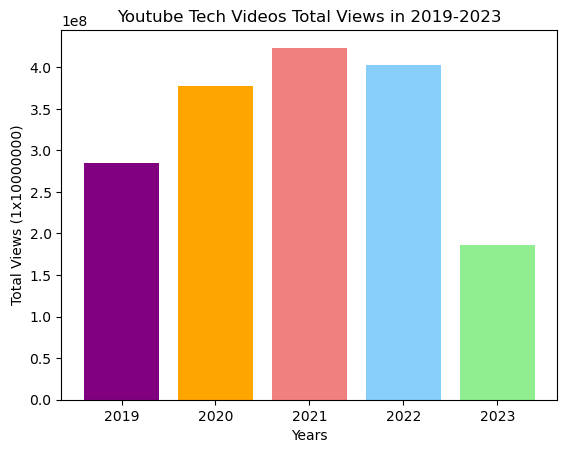

In [131]:
# View chart
years = ["2019", "2020", "2021", "2022", "2023"]
youtube_view = [nineteen_total_view, twenty_total_view, twenty_one_total_view, twenty_two_total_view, twenty_three_total_view]
colors = ["purple", "orange", "lightcoral", "lightskyblue", "lightgreen"]
plt.title("Youtube Tech Videos Total Views in 2019-2023")
plt.xlabel("Years")
plt.ylabel("Total Views (1x10000000)")
plt.bar(years, youtube_view, color=colors, align="center")
#Save view chart
plt.savefig("viewchart.jpg")
plt.show()

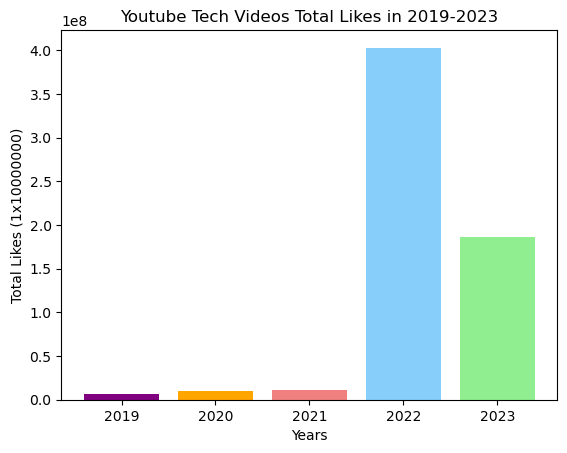

In [132]:
# Like chart
years = ["2019", "2020", "2021", "2022", "2023"]
youtube_like = [nineteen_total_like, twenty_total_like, twenty_one_total_like, twenty_two_total_view, twenty_three_total_view]
colors = ["purple", "orange", "lightcoral", "lightskyblue", "lightgreen"]
plt.title("Youtube Tech Videos Total Likes in 2019-2023")
plt.xlabel("Years")
plt.ylabel("Total Likes (1x10000000)")
plt.bar(years, youtube_like, color=colors, align="center")
#Save like chart
plt.savefig("likechart.jpg")
plt.show()

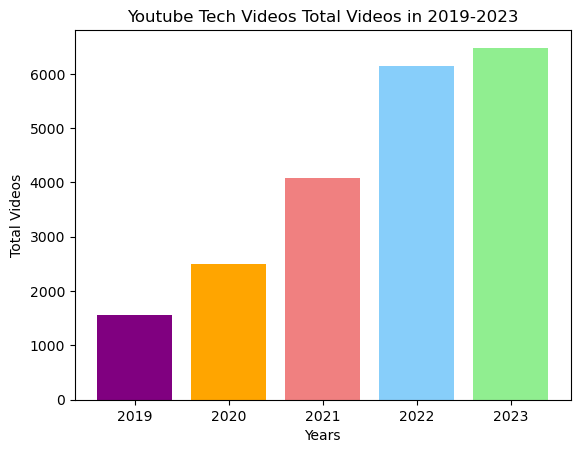

In [133]:
#Total video chart
years = ["2019", "2020", "2021", "2022", "2023"]
youtube_video = [year_nineteen_total, year_twenty_total, year_twenty_one_total, year_twenty_two_total, year_twenty_three_total]
colors = ["purple", "orange", "lightcoral", "lightskyblue", "lightgreen"]
plt.title("Youtube Tech Videos Total Videos in 2019-2023")
plt.xlabel("Years")
plt.ylabel("Total Videos")
plt.bar(years, youtube_video, color=colors, align="center")
#Save total video chart
plt.savefig("videochart.jpg")
plt.show()

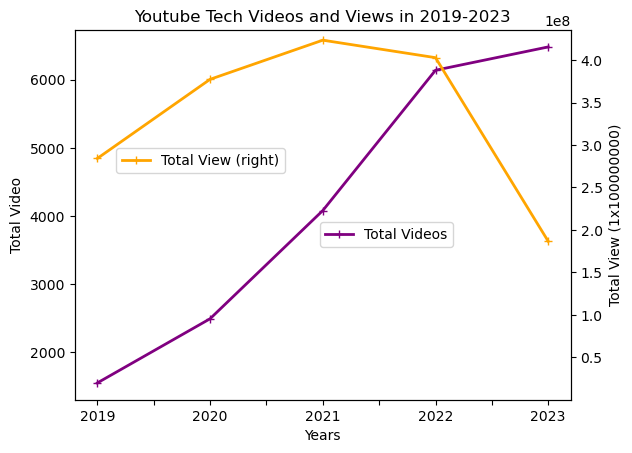

In [134]:
#Total video and view chart
video_view_plot = pd.DataFrame(data={'Years':["2019","2020","2021","2022","2023"], 
                        'total_video':[year_nineteen_total, year_twenty_total, year_twenty_one_total, year_twenty_two_total, year_twenty_three_total], 
                        'total_view':[nineteen_total_view, twenty_total_view, twenty_one_total_view, twenty_two_total_view, twenty_three_total_view]})

fig, ax = plt.subplots() 

total_video_plot= video_view_plot.plot(x = 'Years', y = 'total_video', ax = ax, linewidth=2,marker="+", label="Total Videos", color='purple') 
total_view_plot= video_view_plot.plot(x = 'Years', y = 'total_view', ax = ax, secondary_y = True,color='orange',linewidth=2, marker="+", label="Total View", ylim=1)
total_video_plot.legend(bbox_to_anchor=(0.48, 0.5))
total_view_plot.legend(bbox_to_anchor=(0.07, 0.7))

plt.title("Youtube Tech Videos and Views in 2019-2023")
plt.xlabel("Years")
ax.set_ylabel("Total Video")
ax.right_ax.set_ylabel("Total View (1x100000000)")

#Save video_view chart
plt.savefig("video_view_chart.jpg")
plt.show()

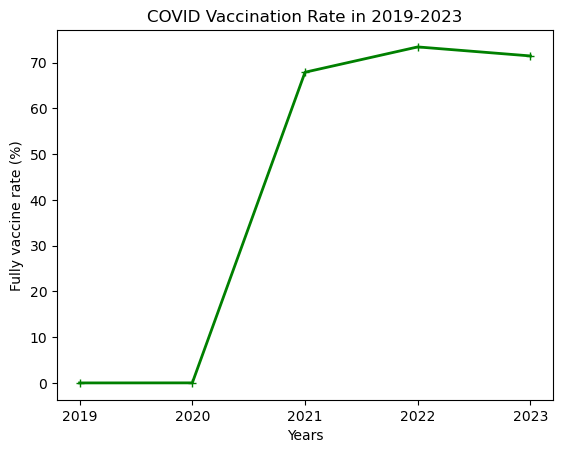

In [135]:
#Vaccine rate chart
years = ["2019", "2020", "2021", "2022", "2023"]
vaccine= 0,0.01,67.89,73.42,71.45
plt.title("COVID Vaccination Rate in 2019-2023")
plt.xlabel("Years")
plt.ylabel("Fully vaccine rate (%)")
plt.plot(years, vaccine, marker="+",color="green", linewidth=2, label="Fully Vaccine Rate" )
plt.savefig("vaccinechart.png")
plt.show()

In [136]:
#Merge youtube video view and fully vaccine rate
merge_data= total_summary.merge(vaccine_summary, how="left")
merge_data

,Year,Total Videos,Total view,Average View,Total like,Average Like,Total comment,Average comment,Fully vaccine rate
0,2023,6480,186602077,28796.616821,7268954.0,1126.271150,296043.0,45.777486,71.45%
1,2022,6138,402914860,65642.694689,15415783.0,2522.215805,493196.0,80.508652,73.42%
2,2021,4080,423513932,103802.434314,11431765.0,2824.750432,587569.0,144.472338,67.89%
3,2020,2493,377401288,151384.391496,9910979.0,4048.602533,526663.0,211.936821,0.01%
4,2019,1552,284221923,183132.682345,6633049.0,4324.021512,423009.0,272.733075,0.00%


In [137]:
merge_plot= pd.DataFrame({"Year":[2019,2020,2021,2022,2023],
                        "Total view":[twenty_three_total_view,twenty_two_total_view,twenty_one_total_view,twenty_total_view,nineteen_total_view],
                        "Fully vaccine rate":[71.45,73.42,67.89,0.01,0]})

#Change to % format
merge_plot["Fully vaccine rate"] = merge_plot["Fully vaccine rate"].map("{:,.2f}%".format)

merge_plot

,Year,Total view,Fully vaccine rate
0,2019,186602077,71.45%
1,2020,402914860,73.42%
2,2021,423513932,67.89%
3,2022,377401288,0.01%
4,2023,284221923,0.00%


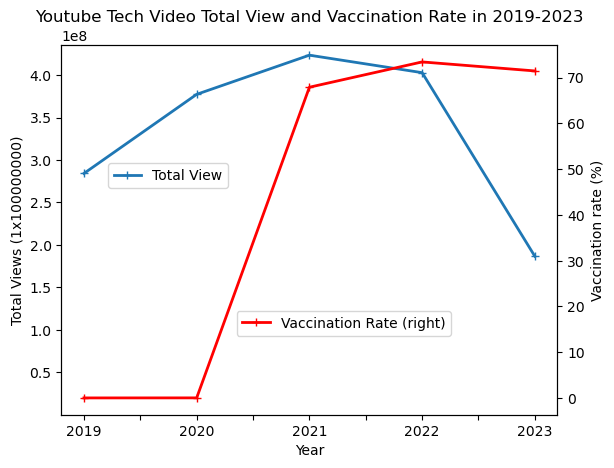

In [138]:
#View and vaccination rate chart
merge_plot = pd.DataFrame(data={'Year':["2019","2020","2021","2022","2023"], 
                        'total_view': [nineteen_total_view, twenty_total_view, twenty_one_total_view, twenty_two_total_view, twenty_three_total_view], 
                        'vaccine': [0,0.01,67.89,73.42,71.45]})

fig, ax = plt.subplots() 

view_plot= merge_plot.plot(x = 'Year', y = 'total_view', ax = ax, linewidth=2,marker="+", label="Total View", ylim=0.5) 
vaccine_plot= merge_plot.plot(x = 'Year', y = 'vaccine', ax = ax, secondary_y = True,color='r',linewidth=2, marker="+", label="Vaccination Rate")
view_plot.legend(bbox_to_anchor=(0.08, 0.7))
vaccine_plot.legend(bbox_to_anchor=(0.8, 0.3))

plt.title("Youtube Tech Video Total View and Vaccination Rate in 2019-2023")
plt.xlabel("Years")
ax.set_ylabel("Total Views (1x100000000)")
ax.right_ax.set_ylabel("Vaccination rate (%)")

#Save comparision chart
plt.savefig("view_vaccine_chart.jpg")
plt.show()

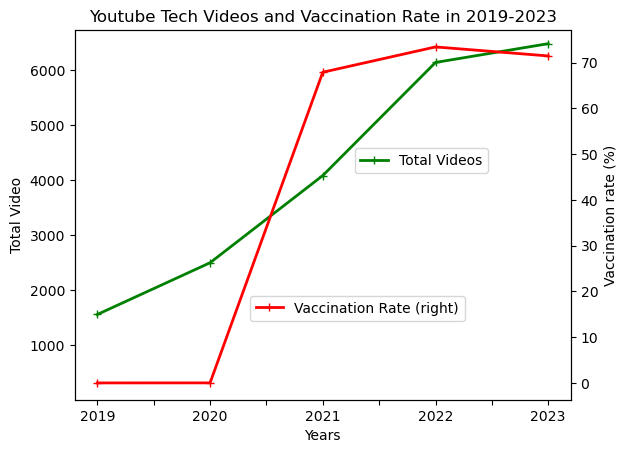

In [139]:
#Total video and vaccination rate chart
video_vaccine_plot = pd.DataFrame(data={'Years':["2019","2020","2021","2022","2023"], 
                        'total_video': [year_nineteen_total, year_twenty_total, year_twenty_one_total, year_twenty_two_total, year_twenty_three_total], 
                        'vaccine': [0,0.01,67.89,73.42,71.45]})

fig, ax = plt.subplots() 

video_plot= video_vaccine_plot.plot(x = 'Years', y = 'total_video', ax = ax, linewidth=2,marker="+", label="Total Videos", ylim=0.5, color='g') 
vaccine_plot= video_vaccine_plot.plot(x = 'Years', y = 'vaccine', ax = ax, secondary_y = True,color='r',linewidth=2, marker="+", label="Vaccination Rate")
video_plot.legend(bbox_to_anchor=(0.55, 0.7))
vaccine_plot.legend(bbox_to_anchor=(0.8, 0.3))

plt.title("Youtube Tech Videos and Vaccination Rate in 2019-2023")
plt.xlabel("Years")
ax.set_ylabel("Total Video")
ax.right_ax.set_ylabel("Vaccination rate (%)")

#Save comparision chart
plt.savefig("video_vaccine_chart.jpg")
plt.show()

In [141]:
# File to Load 
youtube_data_load = Path("data", "video_data_cleaned.csv")

# Read the file & store into Pandas Dataframe
youtube_data = pd.read_csv(youtube_data_load)

# Print
youtube_data

,Unnamed: 0,id,Channel Title,Published At,Channel Id,Video Title,Category Id,Description,Tags,Duration,...,LicensedContent,Projection,View Count,Like Count,Favorite Count,Comment Count,Tag Count,Description Length (characters),Description Length (words),Duration (seconds)
0,0,2ruoagytC7w,PushToProd,2023-09-14T21:00:02Z,UCN0u98NPeC0AW3pD6MbVeNg,day in the life | Jr. Cybersecurity Engineer N...,28,Here’s the part 2 to my day in the life/ vlog!...,"['devops', 'azure', 'aws', 'cloud', 'docker', ...",PT7M22S,...,True,rectangular,1032,61.0,0,22.0,39.0,162,20,442
1,1,gBH1LdSZyFU,PushToProd,2023-09-04T22:27:11Z,UCN0u98NPeC0AW3pD6MbVeNg,day in the life | Jr. Cybersecurity Engineer N...,28,Hey Guys! \n\nHope you enjoy Part 1 of this da...,"['devops', 'azure', 'aws', 'cloud', 'docker', ...",PT14M8S,...,True,rectangular,2006,86.0,0,29.0,39.0,453,72,848
2,2,UhMJ0km4KLs,PushToProd,2023-08-15T21:30:03Z,UCN0u98NPeC0AW3pD6MbVeNg,Prodcast 6 | Is the end of tech near?,28,https://linktr.ee/pushtoprod\n\nHey push2prod ...,"['podcast', 'devops', 'azure', 'aws', 'cloud',...",PT19M29S,...,True,rectangular,793,55.0,0,23.0,39.0,456,75,1169
3,3,qYfxI07QrKo,PushToProd,2023-06-13T20:45:01Z,UCN0u98NPeC0AW3pD6MbVeNg,Prodcast 5 | Biology Degree to Data Scientist,28,"Hey push2prod squad. Welcome to back to the ""P...","['podcast', 'devops', 'azure', 'aws', 'cloud',...",PT25M9S,...,True,rectangular,870,54.0,0,22.0,38.0,393,70,1509
4,4,CKcYF3369LI,PushToProd,2023-06-07T14:00:10Z,UCN0u98NPeC0AW3pD6MbVeNg,From Suit & Tie to Bonnets and Durags: Embraci...,28,NaN,"['podcast', 'devops', 'azure', 'aws', 'cloud',...",PT56S,...,True,rectangular,1679,36.0,0,3.0,38.0,0,1,56
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26506,26506,LMyFZVkJsLQ,Chris Sean,2017-01-14T05:43:23Z,UCu1xbgCV5o48h_BYCQD7KJg,All You NEED to BECOME A JUNIOR Web Developer ...,22,Learn to CODE in just a FEW months here: \n- M...,"['how to become a jr web developer', 'junior w...",PT9M,...,True,rectangular,192485,6246.0,0,504.0,18.0,336,36,540
26507,26507,rG3HPCGB4hU,Chris Sean,2017-01-09T16:45:08Z,UCu1xbgCV5o48h_BYCQD7KJg,"At The Office, Bad Day & Knowing Your Value | ...",22,Learn to CODE in just a FEW months here: \n- M...,"['daily life of a developer', 'the day in the ...",PT8M8S,...,True,rectangular,6810,197.0,0,25.0,14.0,336,36,488
26508,26508,HLgdtA-n_bo,Chris Sean,2016-12-30T00:38:56Z,UCu1xbgCV5o48h_BYCQD7KJg,What It Takes To Become A Web Developer in 2017,22,Learn to CODE in just a FEW months here: \n- M...,"['Learn code', 'html', 'php', 'css', 'jquery',...",PT7M35S,...,True,rectangular,7054,247.0,0,43.0,20.0,336,36,455
26509,26509,yAYJD4kKQ7c,Chris Sean,2016-12-22T17:12:12Z,UCu1xbgCV5o48h_BYCQD7KJg,Developers Q & A | Be Humble But Stay Competi...,22,Q & A | Be Humble But Stay Competitive \n\nNot...,"['developer q & a', 'how to become a developer...",PT14M,...,True,rectangular,3807,134.0,0,16.0,14.0,385,38,840


In [142]:
# Define the keywords to search for 2019
keyword1 = 'Software Developer'
keyword2 = '2019'

# Use str.contains on both columns
result_sd_nineteen = youtube_data[youtube_data['Video Title'].str.contains(keyword1, case=True) | youtube_data['Published At'].str.contains(keyword2, case=True)].count()

In [143]:
# Define the keywords to search for 20219
keyword1 = 'Data Scientist'
keyword2 = '2019'

# Use str.contains on both columns
result_ds_nineteen = youtube_data[youtube_data['Video Title'].str.contains(keyword1, case=True) | youtube_data['Published At'].str.contains(keyword2, case=True)].count()


In [144]:
# Define the keywords to search for 2019
keyword1 = 'Data Analysis'
keyword2 = '2019'

# Use str.contains on both columns
result_da_nineteen = youtube_data[youtube_data['Video Title'].str.contains(keyword1, case=True) | youtube_data['Published At'].str.contains(keyword2, case=True)].count()


In [145]:
# Define the keywords to search for 2019 
keyword1 = 'Web Developer'
keyword2 = '2019'

# Use str.contains on both columns
result_wd_nineteen = youtube_data[youtube_data['Video Title'].str.contains(keyword1, case=True) | youtube_data['Published At'].str.contains(keyword2, case=True)].count()


In [146]:
# Define the keywords to search for 2019
keyword1 = 'Business Analyst'
keyword2 = '2019'

# Use str.contains on both columns
result_ba_nineteen = youtube_data[youtube_data['Video Title'].str.contains(keyword1, case=True) | youtube_data['Published At'].str.contains(keyword2, case=True)].count()


In [147]:
# create a df summary for 2019
twenty_nineteen_summary = ({
    "Software Developer" : [result_sd_nineteen],
    "Data Scientist": [result_ds_nineteen],
    "Data Analysis" : [result_da_nineteen],
    "Business Analyst" : [result_ba_nineteen],
    "Web Developer" : [result_wd_nineteen]
    
})

twenty_nineteen_summary

{'Software Developer': [Unnamed: 0                         1712
  id                                 1712
  Channel Title                      1712
  Published At                       1712
  Channel Id                         1712
  Video Title                        1712
  Category Id                        1712
  Description                        1709
  Tags                               1712
  Duration                           1712
  Dimension                          1712
  Definition                         1712
  Caption                            1712
  LicensedContent                    1712
  Projection                         1712
  View Count                         1712
  Like Count                         1694
  Favorite Count                     1712
  Comment Count                      1711
  Tag Count                          1712
  Description Length (characters)    1712
  Description Length (words)         1712
  Duration (seconds)                 1712
  dtype: int

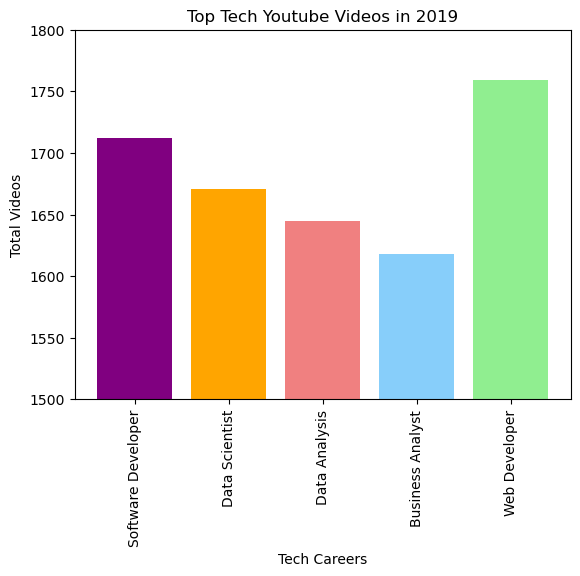

In [148]:
#graph 2019 for video titles
# plot a bar chart for the Tags columns 
tech_careers = ["Software Developer",
    "Data Scientist",
    "Data Analysis",
    "Business Analyst",
    "Web Developer"]
youtube_video_count = ["1712",
                      "1671",
                       "1645",
                       "1618",
                       "1759",]


colors = ["purple", 
          "orange", 
          "lightcoral", 
          "lightskyblue", 
          "lightgreen",]

plt.title("Top Tech Youtube Videos in 2019")
plt.xlabel("Tech Careers")
plt.ylabel("Total Videos")

# Set the y-axis limits to zoom in
plt.ylim(1500, 1800)  

plt.bar(tech_careers, [int(count) for count in youtube_video_count], color=colors,align="center")

# Rotate the x axis labels for better view 
plt.xticks(rotation=90)

# Save total count tagged chart 

plt.show()

In [149]:
# Define the keywords to search for 2020 
keyword1 = 'Software Developer'
keyword2 = '2020'

# Use str.contains on both columns
result_sd = youtube_data[youtube_data['Video Title'].str.contains(keyword1, case=True) | youtube_data['Published At'].str.contains(keyword2, case=True)].count()

In [150]:
# Define the keywords to search for 2020 
keyword1 = 'Data Scientist'
keyword2 = '2020'

# Use str.contains on both columns
result_ds = youtube_data[youtube_data['Video Title'].str.contains(keyword1, case=True) | youtube_data['Published At'].str.contains(keyword2, case=True)].count()


In [151]:
# Define the keywords to search for 2020 
keyword1 = 'Data Analysis'
keyword2 = '2020'

# Use str.contains on both columns
result_da = youtube_data[youtube_data['Video Title'].str.contains(keyword1, case=True) | youtube_data['Published At'].str.contains(keyword2, case=True)].count()


In [152]:
# Define the keywords to search for 2020 
keyword1 = 'Web Developer'
keyword2 = '2020'

# Use str.contains on both columns
result_wd = youtube_data[youtube_data['Video Title'].str.contains(keyword1, case=True) | youtube_data['Published At'].str.contains(keyword2, case=True)].count()


In [153]:
# Define the keywords to search for 2020 
keyword1 = 'Business Analyst'
keyword2 = '2020'

# Use str.contains on both columns
result_ba = youtube_data[youtube_data['Video Title'].str.contains(keyword1, case=True) | youtube_data['Published At'].str.contains(keyword2, case=True)].count()


In [154]:
# create a df summary for 2020
twenty_twenty_summary = ({
    "Software Developer" : [result_sd],
    "Data Scientist": [result_ds],
    "Data Analysis" : [result_da],
    "Business Analyst" : [result_ba],
    "Web Developer" : [result_wd]
    
})

twenty_twenty_summary

{'Software Developer': [Unnamed: 0                         2640
  id                                 2640
  Channel Title                      2640
  Published At                       2640
  Channel Id                         2640
  Video Title                        2640
  Category Id                        2640
  Description                        2634
  Tags                               2640
  Duration                           2640
  Dimension                          2640
  Definition                         2640
  Caption                            2640
  LicensedContent                    2640
  Projection                         2640
  View Count                         2640
  Like Count                         2595
  Favorite Count                     2640
  Comment Count                      2632
  Tag Count                          2640
  Description Length (characters)    2640
  Description Length (words)         2640
  Duration (seconds)                 2640
  dtype: int

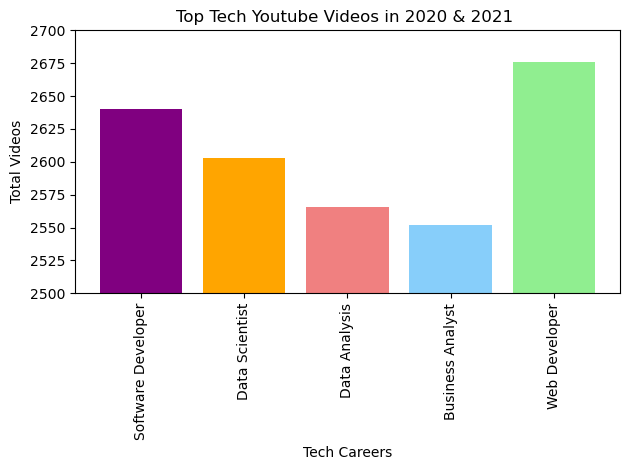

In [155]:
#graph 2020 for video titles
# plot a bar chart for the Tags columns 
tech_careers = ["Software Developer",
    "Data Scientist",
    "Data Analysis",
    "Business Analyst",
    "Web Developer"]
youtube_video_count = ["2640",
                      "2603",
                       "2566",
                       "2552",
                       "2676",]


colors = ["purple", 
          "orange", 
          "lightcoral", 
          "lightskyblue", 
          "lightgreen",]

plt.title("Top Tech Youtube Videos in 2020 & 2021 ")
plt.xlabel("Tech Careers")
plt.ylabel("Total Videos")

# Set the y-axis limits to zoom in
plt.ylim(2500, 2700)  

plt.bar(tech_careers, [int(count) for count in youtube_video_count], color=colors,align="center")

# Rotate the x axis labels for better view 
plt.xticks(rotation=90)

# Save total count tagged chart 
plt.tight_layout()
plt.show()

In [156]:
# Define the keywords to search for 2021
keyword1 = 'Software Developer'
keyword2 = '2021'

# Use str.contains on both columns
result_sd_one = youtube_data[youtube_data['Video Title'].str.contains(keyword1, case=True) | youtube_data['Published At'].str.contains(keyword2, case=True)].count()


In [157]:
# Define the keywords to search for 2021 
keyword1 = 'Data Scientist'
keyword2 = '2021'

# Use str.contains on both columns
result_ds_one = youtube_data[youtube_data['Video Title'].str.contains(keyword1, case=True) | youtube_data['Published At'].str.contains(keyword2, case=True)].count()


In [158]:
# Define the keywords to search for 2021 
keyword1 = 'Data Analysis'
keyword2 = '2021'

# Use str.contains on both columns
result_da_one = youtube_data[youtube_data['Video Title'].str.contains(keyword1, case=True) | youtube_data['Published At'].str.contains(keyword2, case=True)].count()


In [159]:
# Define the keywords to search for 2021
keyword1 = 'Web Developer'
keyword2 = '2021'

# Use str.contains on both columns
result_wd_one= youtube_data[youtube_data['Video Title'].str.contains(keyword1, case=True) | youtube_data['Published At'].str.contains(keyword2, case=True)].count()


In [160]:
# Define the keywords to search for 2021
keyword1 = 'Business Analyst'
keyword2 = '2021'

# Use str.contains on both columns
result_ba_one = youtube_data[youtube_data['Video Title'].str.contains(keyword1, case=True) | youtube_data['Published At'].str.contains(keyword2, case=True)].count()


In [161]:
# create a df summary for 2021
twenty_one_summary = ({
    "Software Developer" : [result_sd_one],
    "Data Scientist": [result_ds_one],
    "Data Analysis" : [result_da_one],
    "Business Analyst" : [result_ba_one],
    "Web Developer" : [result_wd_one]
    
})

twenty_one_summary

{'Software Developer': [Unnamed: 0                         4188
  id                                 4188
  Channel Title                      4188
  Published At                       4188
  Channel Id                         4188
  Video Title                        4188
  Category Id                        4188
  Description                        4073
  Tags                               4188
  Duration                           4188
  Dimension                          4188
  Definition                         4188
  Caption                            4188
  LicensedContent                    4188
  Projection                         4188
  View Count                         4188
  Like Count                         4155
  Favorite Count                     4188
  Comment Count                      4175
  Tag Count                          4188
  Description Length (characters)    4188
  Description Length (words)         4188
  Duration (seconds)                 4188
  dtype: int

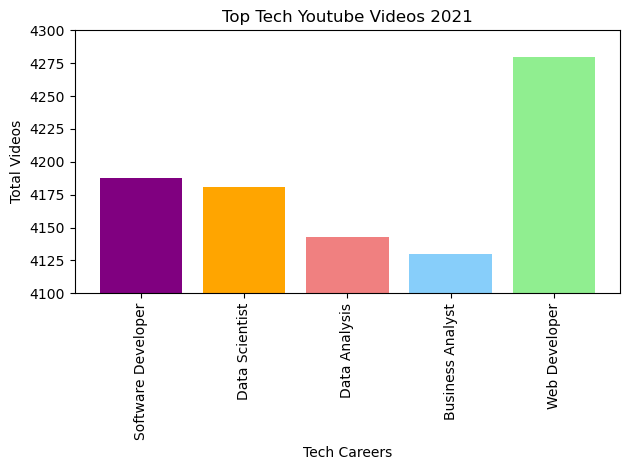

In [163]:
#graph 2021 for video titles
# plot a bar chart for the Tags columns 
tech_careers = ["Software Developer",
    "Data Scientist",
    "Data Analysis",
    "Business Analyst",
    "Web Developer"]
youtube_video_count = ["4188",
                      "4181",
                       "4143",
                       "4130",
                       "4280",]

colors = ["purple", 
          "orange", 
          "lightcoral", 
          "lightskyblue", 
          "lightgreen",]

plt.title("Top Tech Youtube Videos 2021")
plt.xlabel("Tech Careers")
plt.ylabel("Total Videos")

# Set the y-axis limits to zoom in
plt.ylim(4100, 4300)  

plt.bar(tech_careers, [int(count) for count in youtube_video_count], color=colors,align="center")

# Rotate the x axis labels for better view 
plt.xticks(rotation=90)

# Save total count tagged chart 
plt.tight_layout()
plt.show()

In [164]:
# Define the keywords to search for 2022
keyword1 = 'Software Developer'
keyword2 = '2022'

# Use str.contains on both columns
result_sd_two = youtube_data[youtube_data['Video Title'].str.contains(keyword1, case=True) | youtube_data['Published At'].str.contains(keyword2, case=True)].count()

In [165]:
# Define the keywords to search for 2022 
keyword1 = 'Data Scientist'
keyword2 = '2022'

# Use str.contains on both columns
result_ds_two = youtube_data[youtube_data['Video Title'].str.contains(keyword1, case=True) | youtube_data['Published At'].str.contains(keyword2, case=True)].count()


In [166]:
# Define the keywords to search for 2022
keyword1 = 'Data Analysis'
keyword2 = '2022'

# Use str.contains on both columns
result_da_two = youtube_data[youtube_data['Video Title'].str.contains(keyword1, case=True) | youtube_data['Published At'].str.contains(keyword2, case=True)].count()


In [167]:
# Define the keywords to search for 2022
keyword1 = 'Web Developer'
keyword2 = '2022'

# Use str.contains on both columns
result_wd_two= youtube_data[youtube_data['Video Title'].str.contains(keyword1, case=True) | youtube_data['Published At'].str.contains(keyword2, case=True)].count()


In [168]:
# Define the keywords to search for 2022
keyword1 = 'Business Analyst'
keyword2 = '2022'

# Use str.contains on both columns
result_ba_two = youtube_data[youtube_data['Video Title'].str.contains(keyword1, case=True) | youtube_data['Published At'].str.contains(keyword2, case=True)].count()


In [169]:
# create a df summary for 2022
twenty_two_summary = ({
    "Software Developer" : [result_sd_two],
    "Data Scientist": [result_ds_two],
    "Data Analysis" : [result_da_two],
    "Business Analyst" : [result_ba_two],
    "Web Developer" : [result_wd_two]
    
})

twenty_two_summary

{'Software Developer': [Unnamed: 0                         6258
  id                                 6258
  Channel Title                      6258
  Published At                       6258
  Channel Id                         6258
  Video Title                        6258
  Category Id                        6258
  Description                        5683
  Tags                               6258
  Duration                           6258
  Dimension                          6258
  Definition                         6258
  Caption                            6258
  LicensedContent                    6258
  Projection                         6258
  View Count                         6258
  Like Count                         6232
  Favorite Count                     6258
  Comment Count                      6246
  Tag Count                          6258
  Description Length (characters)    6258
  Description Length (words)         6258
  Duration (seconds)                 6258
  dtype: int

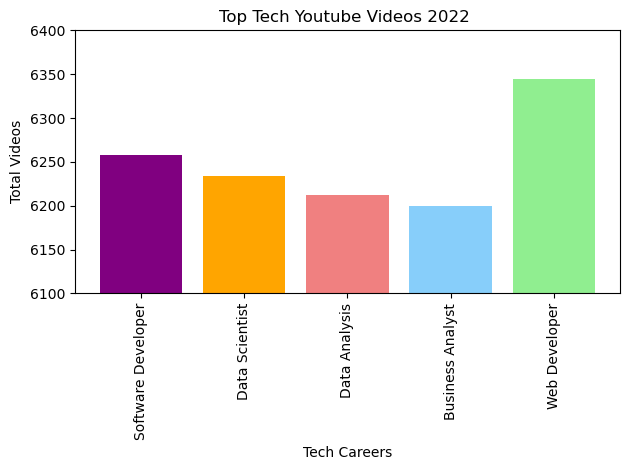

In [170]:
#graph 2022 for video titles
# plot a bar chart for the Tags columns 
tech_careers = ["Software Developer",
    "Data Scientist",
    "Data Analysis",
    "Business Analyst",
    "Web Developer"]
youtube_video_count = ["6258",
                      "6234",
                       "6212",
                       "6200",
                       "6345",]

colors = ["purple", 
          "orange", 
          "lightcoral", 
          "lightskyblue", 
          "lightgreen",]

plt.title("Top Tech Youtube Videos 2022 ")
plt.xlabel("Tech Careers")
plt.ylabel("Total Videos")

# Set the y-axis limits to zoom in
plt.ylim(6100, 6400)  

plt.bar(tech_careers, [int(count) for count in youtube_video_count], color=colors,align="center")

# Rotate the x axis labels for better view 
plt.xticks(rotation=90)

# Save total count tagged chart 
plt.tight_layout()
plt.show()

In [171]:
# Define the keywords to search for 2023
keyword1 = 'Software Developer'
keyword2 = '2023'

# Use str.contains on both columns
result_sd_three = youtube_data[youtube_data['Video Title'].str.contains(keyword1, case=True) | youtube_data['Published At'].str.contains(keyword2, case=True)].count()

In [172]:
# Define the keywords to search for 2023 
keyword1 = 'Data Scientist'
keyword2 = '2023'

# Use str.contains on both columns
result_ds_three = youtube_data[youtube_data['Video Title'].str.contains(keyword1, case=True) | youtube_data['Published At'].str.contains(keyword2, case=True)].count()


In [173]:
# Define the keywords to search for 2023
keyword1 = 'Data Analysis'
keyword2 = '2023'

# Use str.contains on both columns
result_da_three = youtube_data[youtube_data['Video Title'].str.contains(keyword1, case=True) | youtube_data['Published At'].str.contains(keyword2, case=True)].count()


In [174]:
# Define the keywords to search for 2023
keyword1 = 'Web Developer'
keyword2 = '2023'

# Use str.contains on both columns
result_wd_three= youtube_data[youtube_data['Video Title'].str.contains(keyword1, case=True) | youtube_data['Published At'].str.contains(keyword2, case=True)].count()


In [175]:
# Define the keywords to search for 2023
keyword1 = 'Business Analyst'
keyword2 = '2023'

# Use str.contains on both columns
result_ba_three = youtube_data[youtube_data['Video Title'].str.contains(keyword1, case=True) | youtube_data['Published At'].str.contains(keyword2, case=True)].count()


In [176]:
# create a df summary for 2023
twenty_three_summary = ({
    "Software Developer" : [result_sd_three],
    "Data Scientist": [result_ds_three],
    "Data Analysis" : [result_da_three],
    "Business Analyst" : [result_ba_three],
    "Web Developer" : [result_wd_three]
    
})

twenty_three_summary

{'Software Developer': [Unnamed: 0                         6601
  id                                 6601
  Channel Title                      6601
  Published At                       6601
  Channel Id                         6601
  Video Title                        6601
  Category Id                        6601
  Description                        5944
  Tags                               6601
  Duration                           6601
  Dimension                          6601
  Definition                         6601
  Caption                            6601
  LicensedContent                    6601
  Projection                         6601
  View Count                         6601
  Like Count                         6575
  Favorite Count                     6601
  Comment Count                      6588
  Tag Count                          6601
  Description Length (characters)    6601
  Description Length (words)         6601
  Duration (seconds)                 6601
  dtype: int

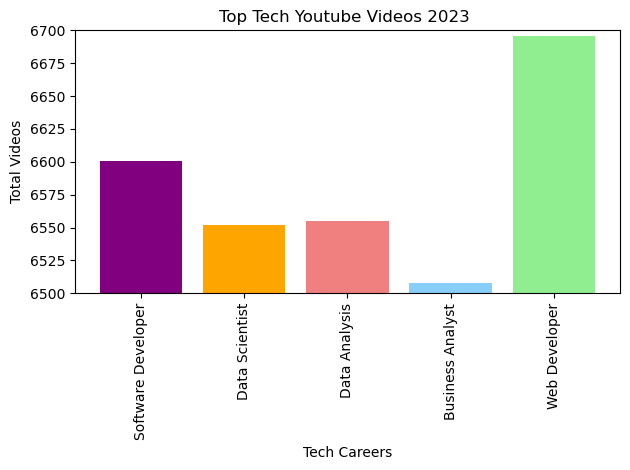

In [177]:
#graph 2023 for video titles
# plot a bar chart for the Tags columns 
tech_careers = ["Software Developer",
    "Data Scientist",
    "Data Analysis",
    "Business Analyst",
    "Web Developer"]
youtube_video_count = ["6601",
                      "6552",
                       "6555",
                       "6508",
                       "6696",]

colors = ["purple", 
          "orange", 
          "lightcoral", 
          "lightskyblue", 
          "lightgreen",]

plt.title("Top Tech Youtube Videos 2023 ")
plt.xlabel("Tech Careers")
plt.ylabel("Total Videos")

# Set the y-axis limits to zoom in
plt.ylim(6500, 6700)  

plt.bar(tech_careers, [int(count) for count in youtube_video_count], color=colors,align="center")

# Rotate the x axis labels for better view 
plt.xticks(rotation=90)

# Save total count tagged chart 
plt.tight_layout()
plt.show()

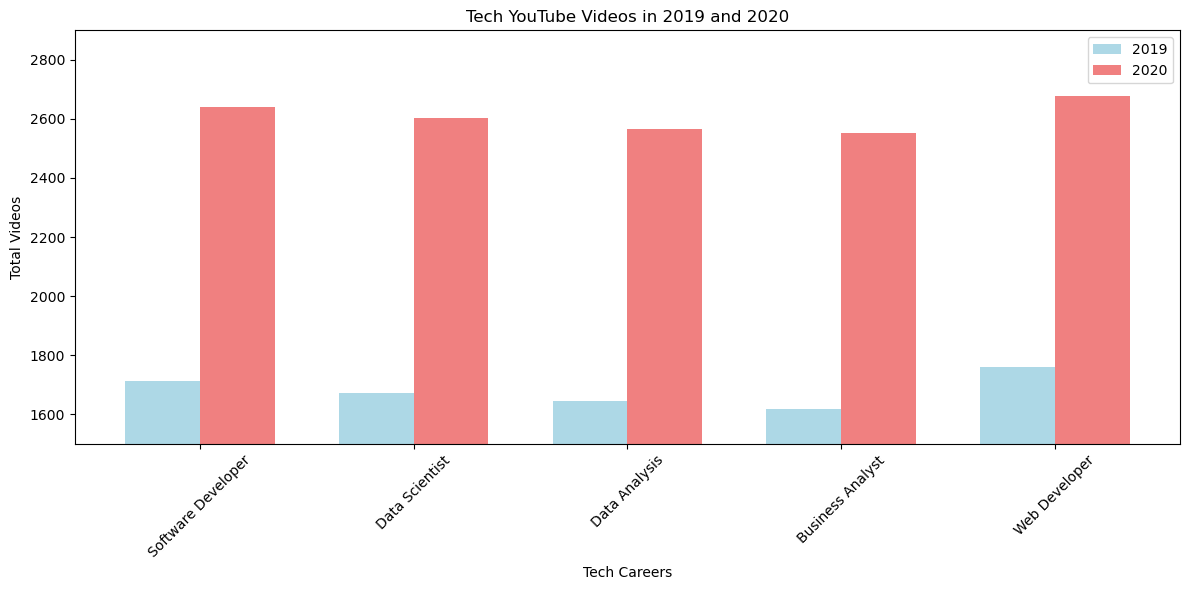

In [181]:
tech_careers = ["Software Developer", "Data Scientist", "Data Analysis", "Business Analyst", "Web Developer"]
youtube_video_count_2019 = [1712, 1671, 1645, 1618, 1759]
youtube_video_count_2020 = [2640, 2603, 2566, 2552, 2676]

bar_width = 0.35
index = np.arange(len(tech_careers))

plt.figure(figsize=(12, 6))

plt.bar(index - bar_width/2, youtube_video_count_2019, bar_width, label='2019', color='lightblue')
plt.bar(index + bar_width/2, youtube_video_count_2020, bar_width, label='2020', color='lightcoral')

plt.title("Tech YouTube Videos in 2019 and 2020")
plt.xlabel("Tech Careers")
plt.ylabel("Total Videos")
plt.xticks(index, tech_careers, rotation=45)
plt.ylim(1500, 2900)
plt.legend()

plt.tight_layout()
plt.show()

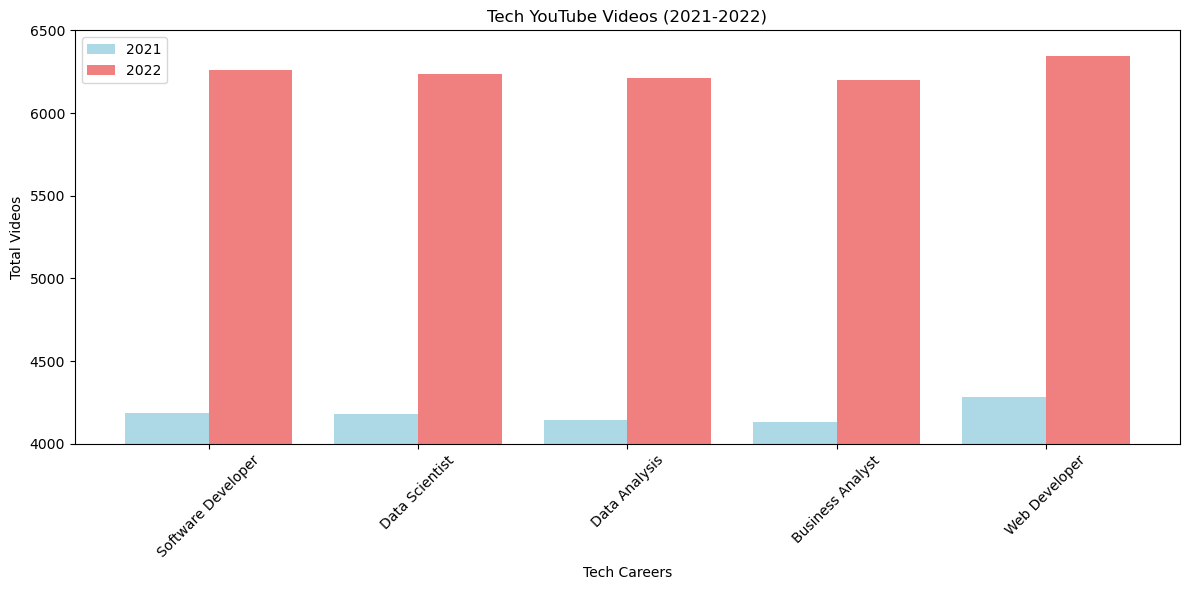

In [182]:
tech_careers = ["Software Developer", "Data Scientist", "Data Analysis", "Business Analyst", "Web Developer"]
youtube_video_count_2021 = [4188, 4181, 4143, 4130, 4280]
youtube_video_count_2022 = [6258, 6234, 6212, 6200, 6345]

bar_width = 0.4
index = np.arange(len(tech_careers))

plt.figure(figsize=(12, 6))

plt.bar(index - bar_width/2, youtube_video_count_2021, bar_width, label='2021', color='lightblue')
plt.bar(index + bar_width/2, youtube_video_count_2022, bar_width, label='2022', color='lightcoral')

plt.title("Tech YouTube Videos (2021-2022)")
plt.xlabel("Tech Careers")
plt.ylabel("Total Videos")
plt.xticks(index, tech_careers, rotation=45)
plt.ylim(4000, 6500)
plt.legend()

plt.tight_layout()
plt.show()

In [187]:
california_df['Date'] = pd.to_datetime(california_df[['Year', 'Month']].assign(day=1))
california_df.set_index('Date', inplace=True)

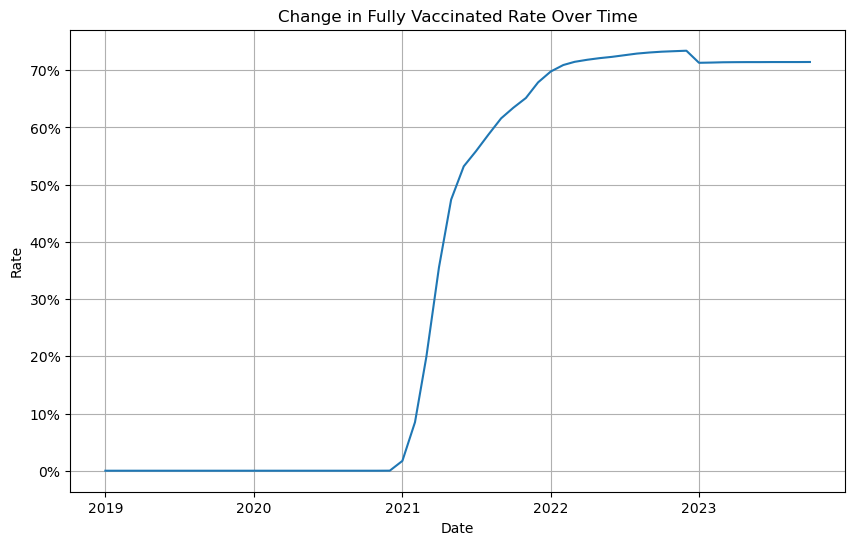

In [188]:
plt.figure(figsize=(10, 6))


ax = plt.gca()
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))  # 1.0 means 100%

plt.plot(california_df['Fully Vaccinated Rate'])
plt.title('Change in Fully Vaccinated Rate Over Time')
plt.xlabel('Date')
plt.ylabel('Rate')
plt.grid(True)
plt.show()

In [189]:
california_df['date_ordinal'] = california_df.index.to_series().apply(lambda x: x.toordinal())

In [191]:
channel_df = video_df[video_df["Channel Title"] == "A Life Engineered"]
channel_df['date_ordinal'] = pd.to_datetime(channel_df["Publish Date"]).apply(lambda date: date.toordinal())

/var/folders/5m/31g0vz1s02x8sdpqgtmzpxh00000gn/T/ipykernel_27004/3152973309.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  channel_df['date_ordinal'] = pd.to_datetime(channel_df["Publish Date"]).apply(lambda date: date.toordinal())


/var/folders/5m/31g0vz1s02x8sdpqgtmzpxh00000gn/T/ipykernel_27004/2061618921.py:28: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(new_labels)


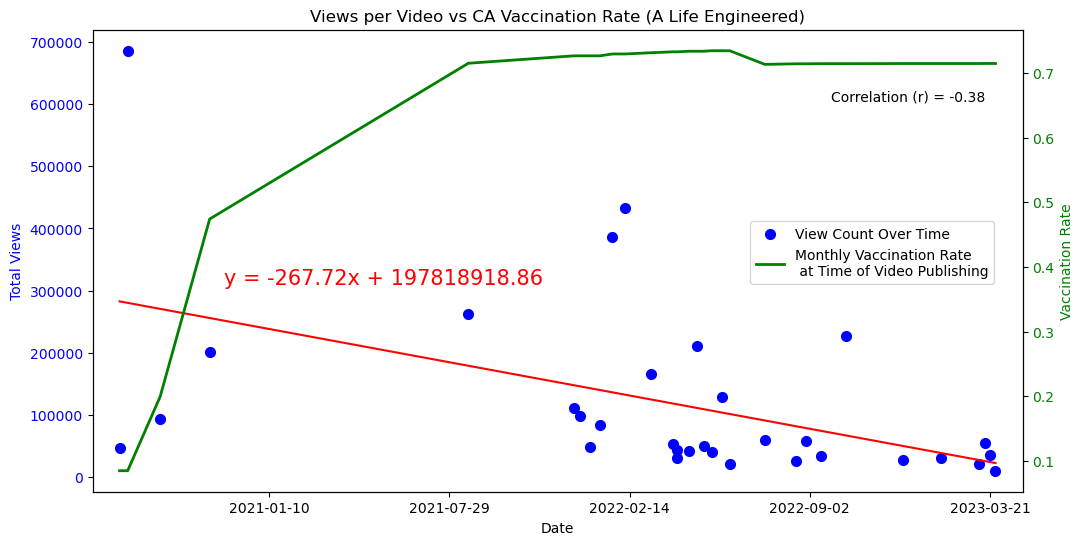

<Figure size 640x480 with 0 Axes>

In [192]:
# Create a figure and two subplots
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot the first set of data (Bootcamp Videos) on the first axis
ax1.scatter(channel_df["date_ordinal"], channel_df["View Count"], marker='o', color='blue', linestyle='-', linewidth=2, label='View Count Over Time')
ax1.set_xlabel('Date')
ax1.set_ylabel('Total Views', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.set_title('Views per Video vs CA Vaccination Rate (A Life Engineered)')

# Create a second y-axis for the second dataset (Total Videos)
ax2 = ax1.twinx()
ax2.plot(channel_df["date_ordinal"], channel_df["Fully Vaccinated Rate"], color='green', linestyle='-', linewidth=2, label="Monthly Vaccination Rate \n at Time of Video Publishing")
ax2.set_ylabel('Vaccination Rate', color='green')
ax2.tick_params(axis='y', labelcolor='green')

# Calculate the correlation coefficient (r value)
correlation = np.corrcoef(channel_df["View Count"], channel_df["Fully Vaccinated Rate"])[0, 1]

# Add r value as text in the bottom right corner
ax1.text(.96, .87, f'Correlation (r) = {correlation:.2f}', transform=ax2.transAxes, fontsize=10,
        verticalalignment='top', horizontalalignment='right', color='black')

# https://stackoverflow.com/questions/29308729/how-to-plot-a-linear-regression-with-datetimes-on-the-x-axis
ax1.set_xlabel('Date')
new_labels = [date.fromordinal(int(item)) for item in ax1.get_xticks()]
new_labels_2 = [date.fromordinal(int(item)) for item in ax1.get_xticks()]
ax1.set_xticklabels(new_labels)

# Add the linear regression equation and line to plot
x_values = channel_df['date_ordinal']
y_values = channel_df['View Count']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# plt.scatter(x_values,y_values)
ax1.plot(x_values,regress_values,"r-")
ax1.annotate(line_eq,(737950,310000),fontsize=15,color="red")
ax1.set_xlim(channel_df['date_ordinal'].min()-30, channel_df['date_ordinal'].max()+30)
ax2.set_xlim(channel_df['date_ordinal'].min()-30, channel_df['date_ordinal'].max()+30)

# Add legend
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines + lines2, labels + labels2, bbox_to_anchor=(0.7, 0.6))

# Show the plot
plt.show()
plt.savefig("lifeengineered.jpg")

/var/folders/5m/31g0vz1s02x8sdpqgtmzpxh00000gn/T/ipykernel_27004/2336377686.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  channel_df['date_ordinal'] = pd.to_datetime(channel_df["Publish Date"]).apply(lambda date: date.toordinal())
/var/folders/5m/31g0vz1s02x8sdpqgtmzpxh00000gn/T/ipykernel_27004/2336377686.py:32: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(new_labels)


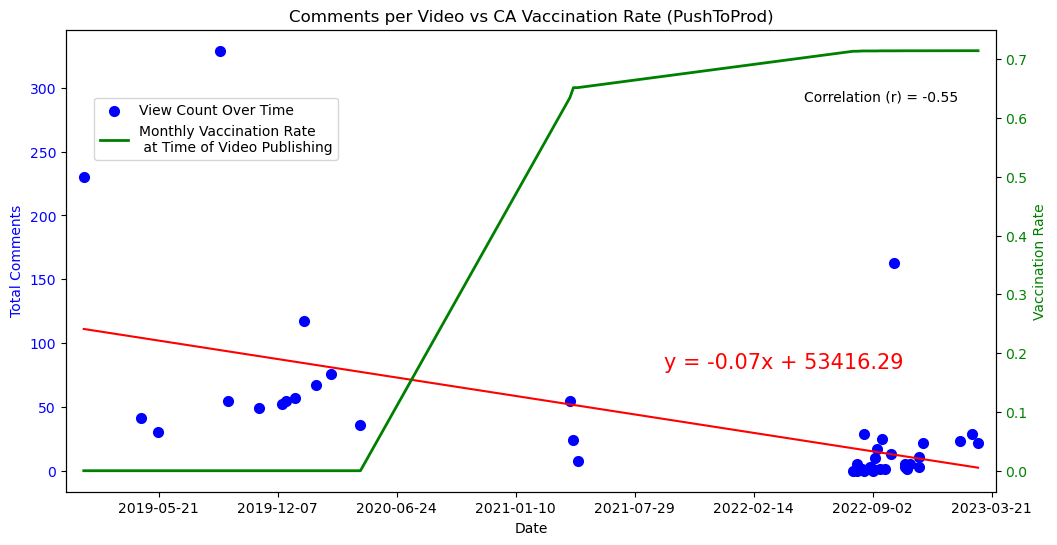

In [193]:
channel_df = video_df[video_df["Channel Title"] == "PushToProd"]
channel_df['date_ordinal'] = pd.to_datetime(channel_df["Publish Date"]).apply(lambda date: date.toordinal())


# Create a figure and two subplots
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot the first set of data (Bootcamp Videos) on the first axis
ax1.scatter(channel_df["date_ordinal"], channel_df["Comment Count"], marker='o', color='blue', linestyle='-', linewidth=2, label='View Count Over Time')
ax1.set_xlabel('Date')
ax1.set_ylabel('Total Comments', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.set_title('Comments per Video vs CA Vaccination Rate (PushToProd)')

# Create a second y-axis for the second dataset (Total Videos)
ax2 = ax1.twinx()
ax2.plot(channel_df["date_ordinal"], channel_df["Fully Vaccinated Rate"], color='green', linestyle='-', linewidth=2, label="Monthly Vaccination Rate \n at Time of Video Publishing")
ax2.set_ylabel('Vaccination Rate', color='green')
ax2.tick_params(axis='y', labelcolor='green')

# Calculate the correlation coefficient (r value)
correlation = np.corrcoef(channel_df["Comment Count"], channel_df["Fully Vaccinated Rate"])[0, 1]

# Add r value as text in the bottom right corner
ax1.text(.96, .87, f'Correlation (r) = {correlation:.2f}', transform=ax2.transAxes, fontsize=10,
        verticalalignment='top', horizontalalignment='right', color='black')

# https://stackoverflow.com/questions/29308729/how-to-plot-a-linear-regression-with-datetimes-on-the-x-axis
ax1.set_xlabel('Date')
new_labels = [date.fromordinal(int(item)) for item in ax1.get_xticks()]
new_labels_2 = [date.fromordinal(int(item)) for item in ax1.get_xticks()]
ax1.set_xticklabels(new_labels)

# Add the linear regression equation and line to plot
x_values = channel_df['date_ordinal']
y_values = channel_df['Comment Count']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
#ax1.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")

# plt.scatter(x_values,y_values)
ax1.plot(x_values,regress_values,"r-")
ax1.annotate(line_eq,(738250,80),fontsize=15,color="red")
ax1.set_xlim(channel_df['date_ordinal'].min()-30, channel_df['date_ordinal'].max()+30)
ax2.set_xlim(channel_df['date_ordinal'].min()-30, channel_df['date_ordinal'].max()+30)

# Add legend
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines + lines2, labels + labels2, bbox_to_anchor=(0.3, 0.868))

# Show the plot
plt.show()


In [194]:
# Channel View Count vs Fully Vaccinated Rate
correlations = {}
for channel in video_df["Channel Title"].unique():
    correlations[channel] = np.corrcoef(video_df[video_df["Channel Title"] == channel]["View Count"], video_df[video_df["Channel Title"] == channel]["Fully Vaccinated Rate"])[0, 1]

In [195]:
#https://stackoverflow.com/questions/44664247/python-dictionary-how-to-get-all-keys-with-specific-values
strong_corr = [(k,v) for k,v in correlations.items() if (float(v) >= .5) or (float(v) <= -.5)]
medium_corr = [(k,v) for k,v in correlations.items() if (float(v) >= .3 and float(v) < .5) or (float(v) <= -.3 and float(v) >= -.5)]
weak_corr = [(k,v) for k,v in correlations.items() if (float(v) >= 0 and float(v) < .3) or (float(v) <= 0 and float(v) >= -.3)]

In [196]:
medium_corr

[('PushToProd', -0.37413120330465827),
 ('thedevlife', -0.44225022632597816),
 ('A Life Engineered', -0.38303031495323747)]

In [197]:
strong_corr

[]

In [198]:
# Channel View Count vs One Dose Rate
correlations2 = {}
for channel in video_df["Channel Title"].unique():
    correlations2[channel] = np.corrcoef(video_df[video_df["Channel Title"] == channel]["View Count"], video_df[video_df["Channel Title"] == channel]["One Dose Rate"])[0, 1]

In [199]:
strong_corr2 = [(k,v) for k,v in correlations2.items() if (float(v) >= .5) or (float(v) <= -.5)]
medium_corr2 = [(k,v) for k,v in correlations2.items() if (float(v) >= .3 and float(v) < .5) or (float(v) <= -.3 and float(v) >= -.5)]
weak_corr2 = [(k,v) for k,v in correlations2.items() if (float(v) >= 0 and float(v) < .3) or (float(v) <= 0 and float(v) >= -.3)]

In [200]:
strong_corr2

[]

In [201]:
medium_corr2

[('PushToProd', -0.3743459908316764),
 ('thedevlife', -0.4485709627494402),
 ('Data With Mo', -0.30997812787737355),
 ('A Life Engineered', -0.401013007486235)]

In [202]:
# Channel View Count vs Up To Date Rate
correlations3 = {}
for channel in video_df["Channel Title"].unique():
    correlations3[channel] = np.corrcoef(video_df[video_df["Channel Title"] == channel]["View Count"], video_df[video_df["Channel Title"] == channel]["Up To Date Rate"])[0, 1]

In [203]:
strong_corr3 = [(k,v) for k,v in correlations3.items() if (float(v) >= .5) or (float(v) <= -.5)]
medium_corr3 = [(k,v) for k,v in correlations3.items() if (float(v) >= .3 and float(v) < .5) or (float(v) <= -.3 and float(v) >= -.5)]
weak_corr3 = [(k,v) for k,v in correlations3.items() if (float(v) >= 0 and float(v) < .3) or (float(v) <= 0 and float(v) >= -.3)]

In [204]:
strong_corr3

[]

In [205]:
medium_corr3

[('PushToProd', -0.3283344101870942),
 ('My Lesson', 0.39175511695241544),
 ('Jack Ross', -0.42201593264718684),
 ('A Life Engineered', -0.49599592248318647)]

In [206]:
correlations_likes = {}
for channel in video_df["Channel Title"].unique():
    correlations_likes[channel] = np.corrcoef(video_df[video_df["Channel Title"] == channel]["Like Count"], video_df[video_df["Channel Title"] == channel]["Fully Vaccinated Rate"])[0, 1]

In [207]:
strong_corr_likes = [(k,v) for k,v in correlations_likes.items() if (float(v) >= .5) or (float(v) <= -.5)]
medium_corr_likes = [(k,v) for k,v in correlations_likes.items() if (float(v) >= .3 and float(v) < .5) or (float(v) <= -.3 and float(v) >= -.5)]
weak_corr_likes = [(k,v) for k,v in correlations_likes.items() if (float(v) >= 0 and float(v) < .3) or (float(v) <= 0 and float(v) >= -.3)]

In [208]:
strong_corr_likes

[]

In [209]:
medium_corr_likes

[('PushToProd', -0.47469300334308684),
 ('thedevlife', -0.36022590520686515),
 ('Rahul Pandey', 0.3100423455105178),
 ('A Life Engineered', -0.30618256183883635)]

In [210]:
correlations_likes_2 = {}
for channel in video_df["Channel Title"].unique():
    correlations_likes_2[channel] = np.corrcoef(video_df[video_df["Channel Title"] == channel]["Like Count"], video_df[video_df["Channel Title"] == channel]["One Dose Rate"])[0, 1]

In [211]:
correlations_comments = {}
for channel in video_df["Channel Title"].unique():
    correlations_comments[channel] = np.corrcoef(video_df[video_df["Channel Title"] == channel]["Comment Count"], video_df[video_df["Channel Title"] == channel]["Fully Vaccinated Rate"])[0, 1]

In [212]:
strong_corr_comments = [(k,v) for k,v in correlations_comments.items() if (float(v) >= .5) or (float(v) <= -.5)]
medium_corr_comment = [(k,v) for k,v in correlations_comments.items() if (float(v) >= .3 and float(v) < .5) or (float(v) <= -.3 and float(v) >= -.5)]
weak_corr_comments = [(k,v) for k,v in correlations_comments.items() if (float(v) >= 0 and float(v) < .3) or (float(v) <= 0 and float(v) >= -.3)]

In [213]:
strong_corr_comments

[('PushToProd', -0.5516787396011719)]

In [214]:
medium_corr_comment

[('Thu Vu data analytics', 0.329295592230249),
 ('A Life Engineered', -0.32427262787613986)]